In [9]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd

# Création du DataFrame fictif
data = {
    'idclient': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
    'année': [2020, 2020, 2020, 2021, 2021, 2021, 2020, 2020, 2020, 2021, 2021, 2021],
    'mois': [10, 11, 12, 1, 2, 3, 10, 11, 12, 1, 2, 3],
    'code_operation': [515, 520, 525, 530, 515, 155, 515, 520, 525, 530, 515, 540]
}

df = pd.DataFrame(data)

# Triez le DataFrame par client, année et mois
df = df.sort_values(['idclient', 'année', 'mois'])

# Ajoutez une colonne pour indiquer si le code d'opération 515 est présent pour chaque trimestre
df['code_515_present'] = 0 #N

# Groupement par client
#grouped = df.groupby('idclient')

# Utilisez une fenêtre glissante avec rolling pour vérifier chaque trimestre
df['code_515_present'] = df.groupby('idclient')['code_operation'].rolling(window=3, min_periods=1).apply(lambda x: 1 if any(x == 515) else 0)\
.reset_index(0, drop=True)

# Affichage du DataFrame résultant
print(df)


    idclient  année  mois  code_operation  code_515_present
0          1   2020    10             515               1.0
6          1   2020    10             515               1.0
1          1   2020    11             520               1.0
7          1   2020    11             520               1.0
2          1   2020    12             525               0.0
8          1   2020    12             525               0.0
3          1   2021     1             530               0.0
9          1   2021     1             530               0.0
4          1   2021     2             515               1.0
5          1   2021     3             155               1.0
10         2   2021     2             515               1.0
11         2   2021     3             540               1.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idclient          12 non-null     int64 
 1   année             12 non-null     int64 
 2   mois              12 non-null     int64 
 3   code_operation    12 non-null     int64 
 4   montant           12 non-null     int64 
 5   code_515_present  12 non-null     object
dtypes: int64(5), object(1)
memory usage: 672.0+ bytes


In [67]:
path = 'archive/UCI_Credit_Card.csv'
df = pd.read_csv(path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [69]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [70]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis¶
Dependent Variable:

In [71]:
#renaming for better convinience
df['IsDefaulter'] =df ['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)
# df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

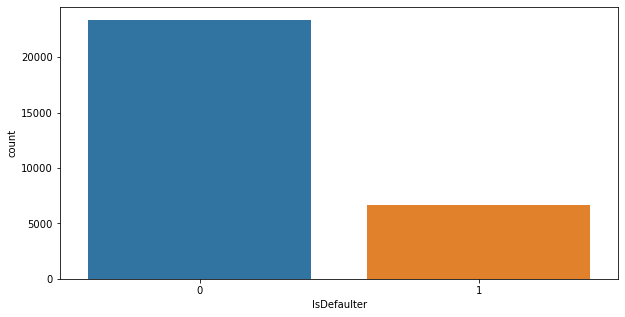

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [73]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

## Variable indépendante :
### Caractéristiques catégorielles
Nous avons quelques caractéristiques catégorielles dans notre ensemble de données. Voyons comment elles sont liées à notre classe cible.

In [74]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [75]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [76]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [77]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

### Plotting our categorical features

In [78]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [79]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [80]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

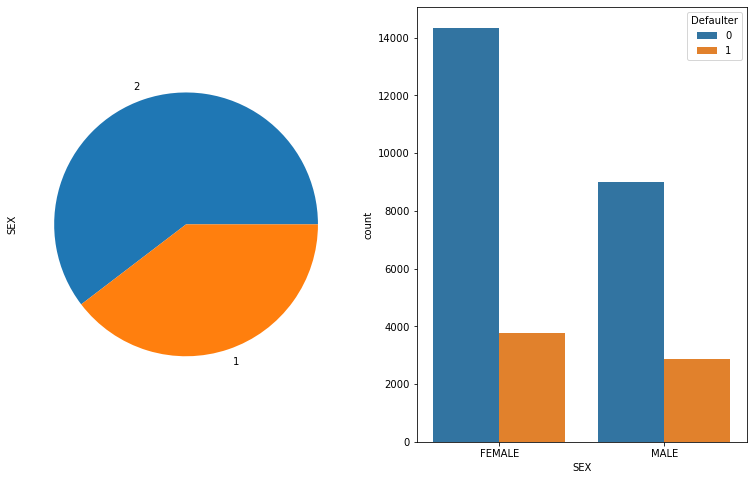

<Figure size 720x360 with 0 Axes>

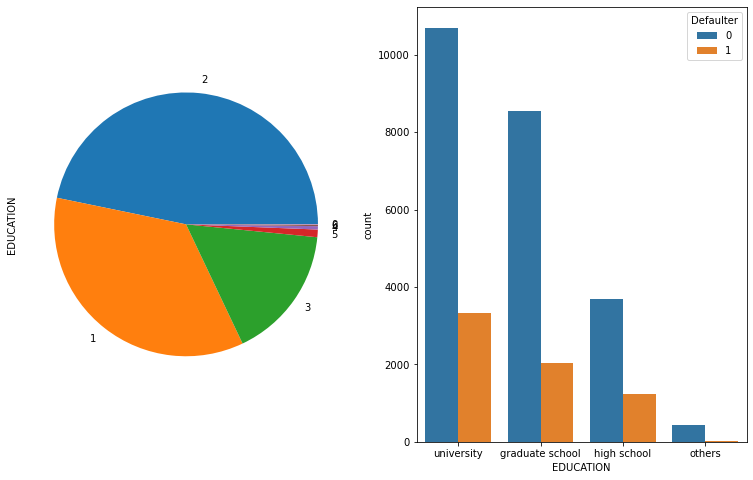

<Figure size 720x360 with 0 Axes>

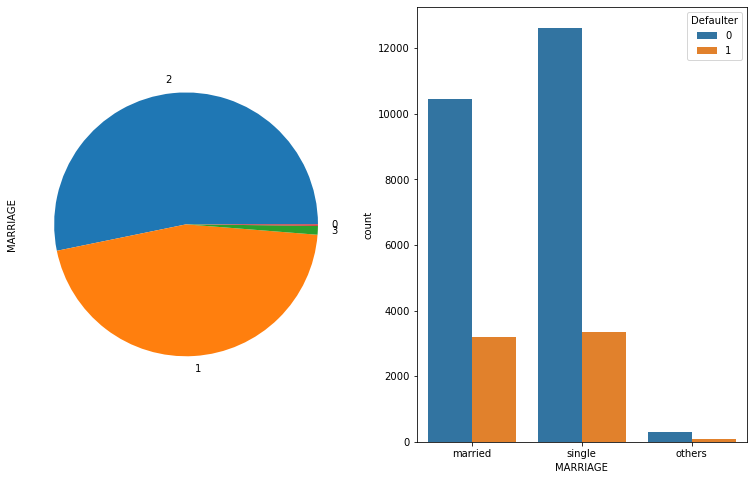

In [81]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(13,8))
    df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

<AxesSubplot:xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

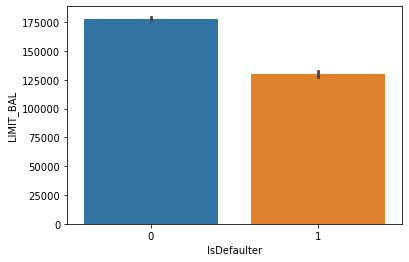

In [82]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

Q1 (premier quartile) : Le premier quartile divise les données en deux parties égales, où 25% des valeurs se situent en dessous de Q1. Cela signifie que 25% des données sont inférieures à Q1. 
 
Q2 (deuxième quartile) : Q2 est simplement une autre appellation pour la médiane. Il divise les données en deux parties égales, où 50% des valeurs se situent en dessous de Q2 et 50% des valeurs se situent au-dessus de Q2. 
 
Q3 (troisième quartile) : Le troisième quartile divise les données en deux parties égales, où 75% des valeurs se situent en dessous de Q3. Cela signifie que 25% des données sont supérieures à Q3

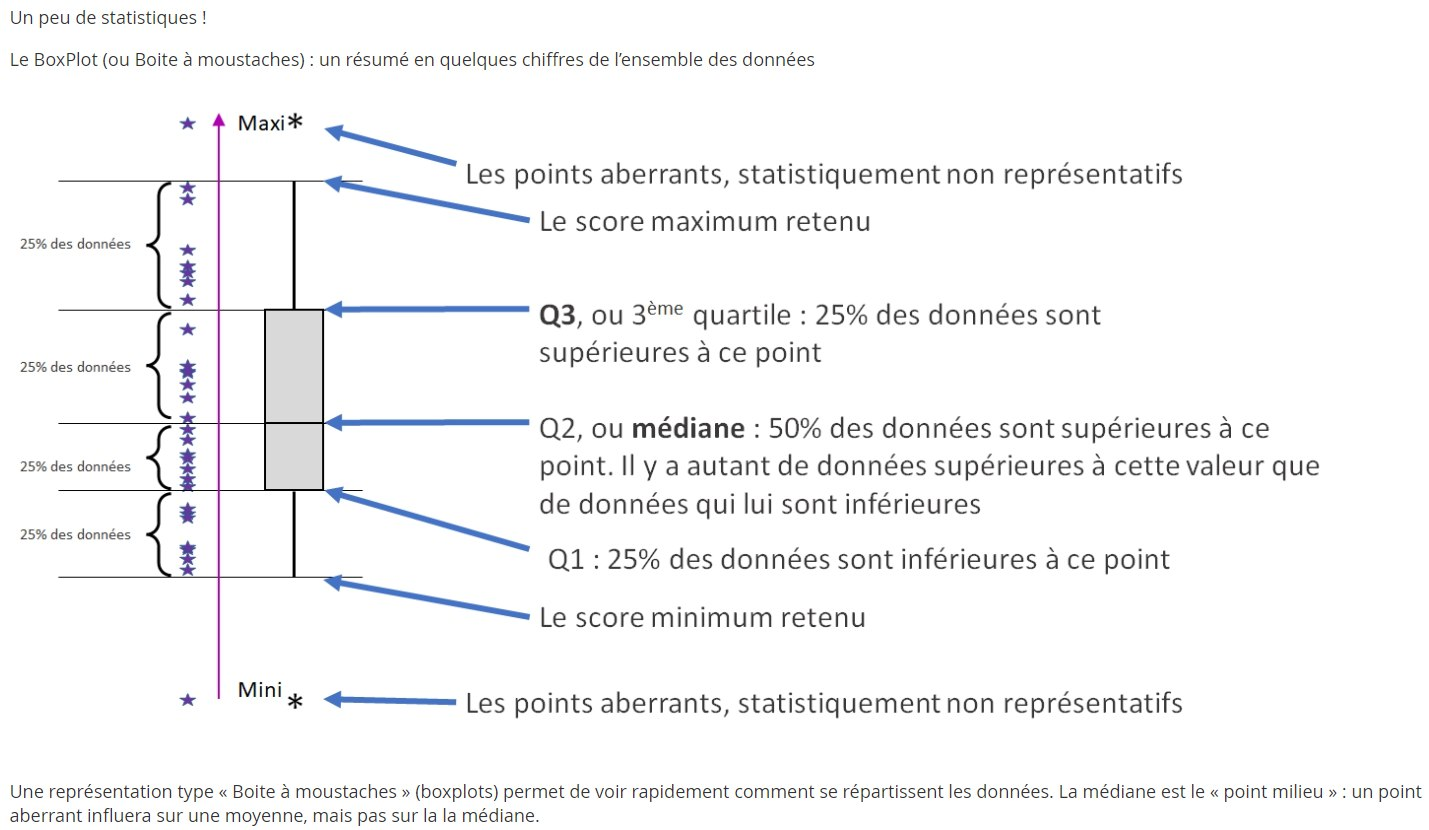

In [23]:
from IPython.display import Image
Image(filename='img.jpg')

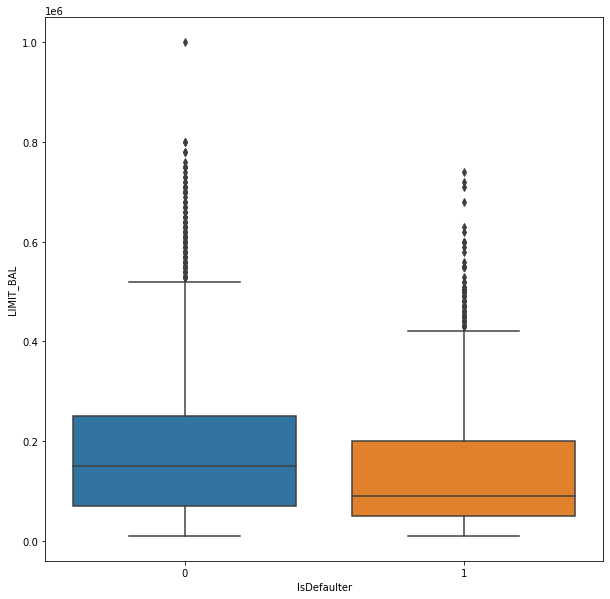

In [83]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [84]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [85]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [86]:
df['AGE'].value_counts()
df['AGE']=df['AGE'].astype('int')

<AxesSubplot:xlabel='index', ylabel='AGE'>

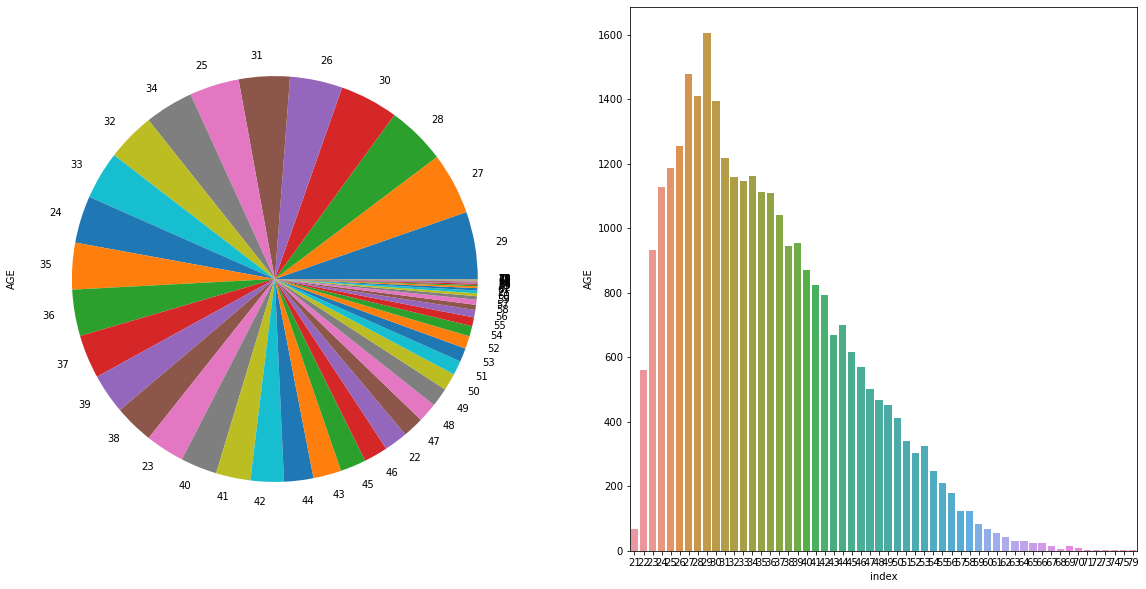

In [87]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [88]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [89]:
df = df.astype('int')

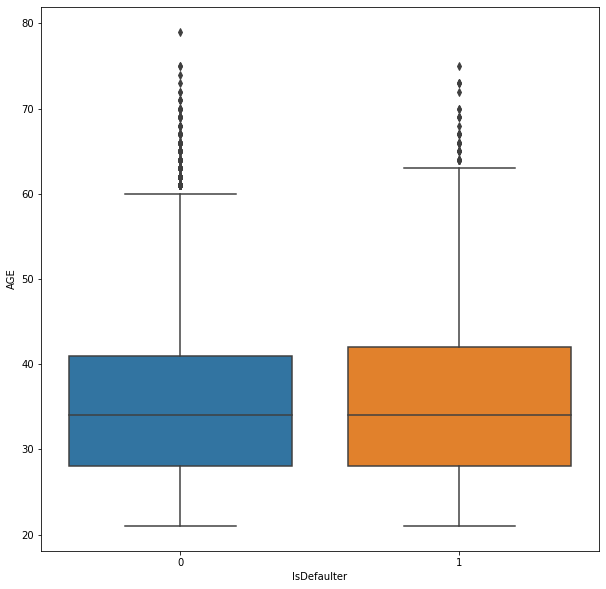

In [90]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

In [91]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

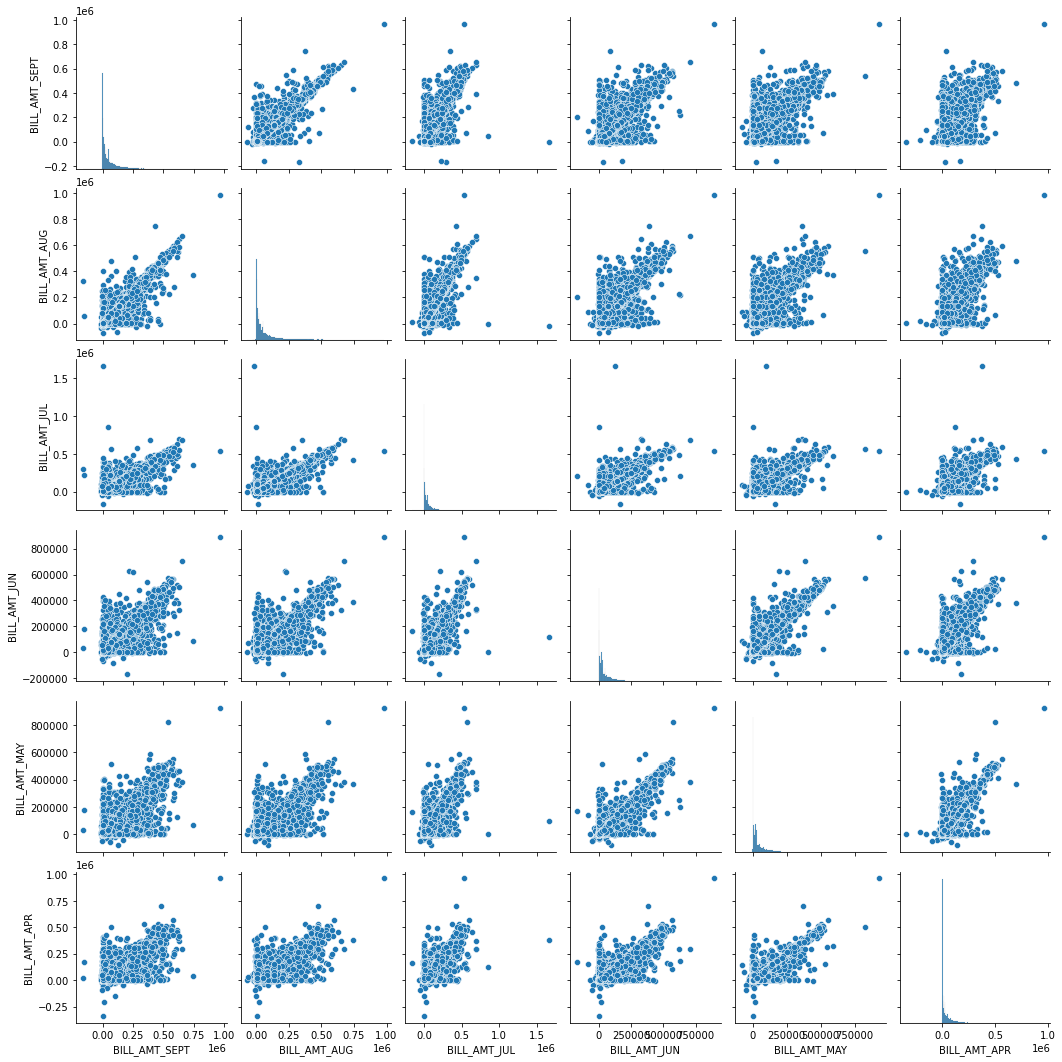

In [92]:
sns.pairplot(data = bill_amnt_df)

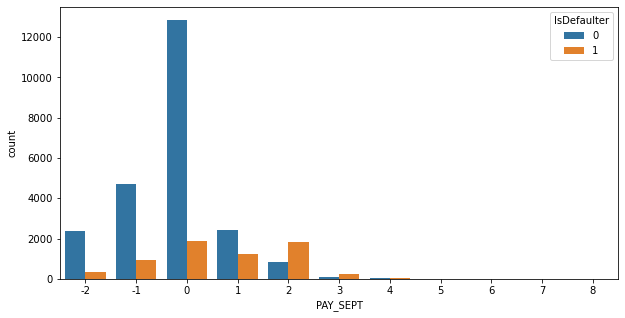

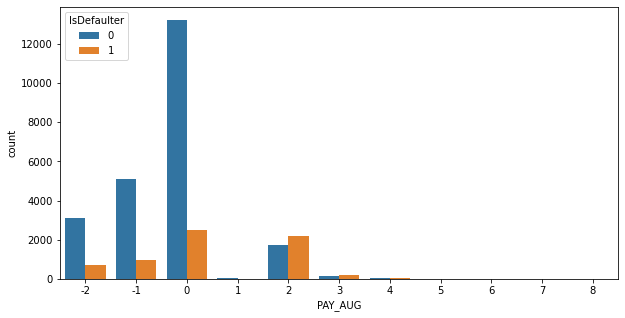

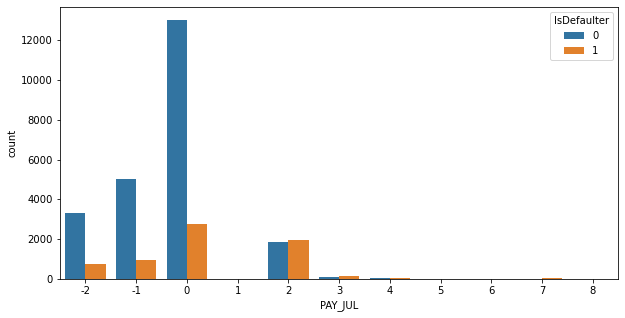

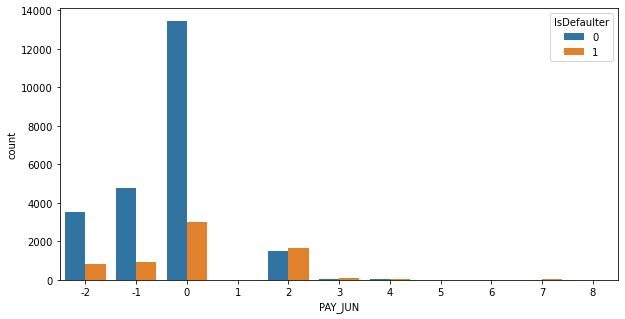

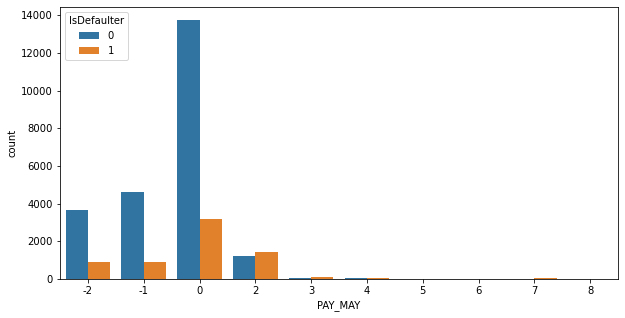

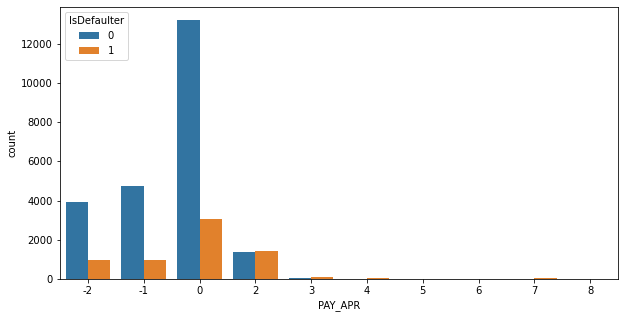

In [93]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'IsDefaulter', data = df)

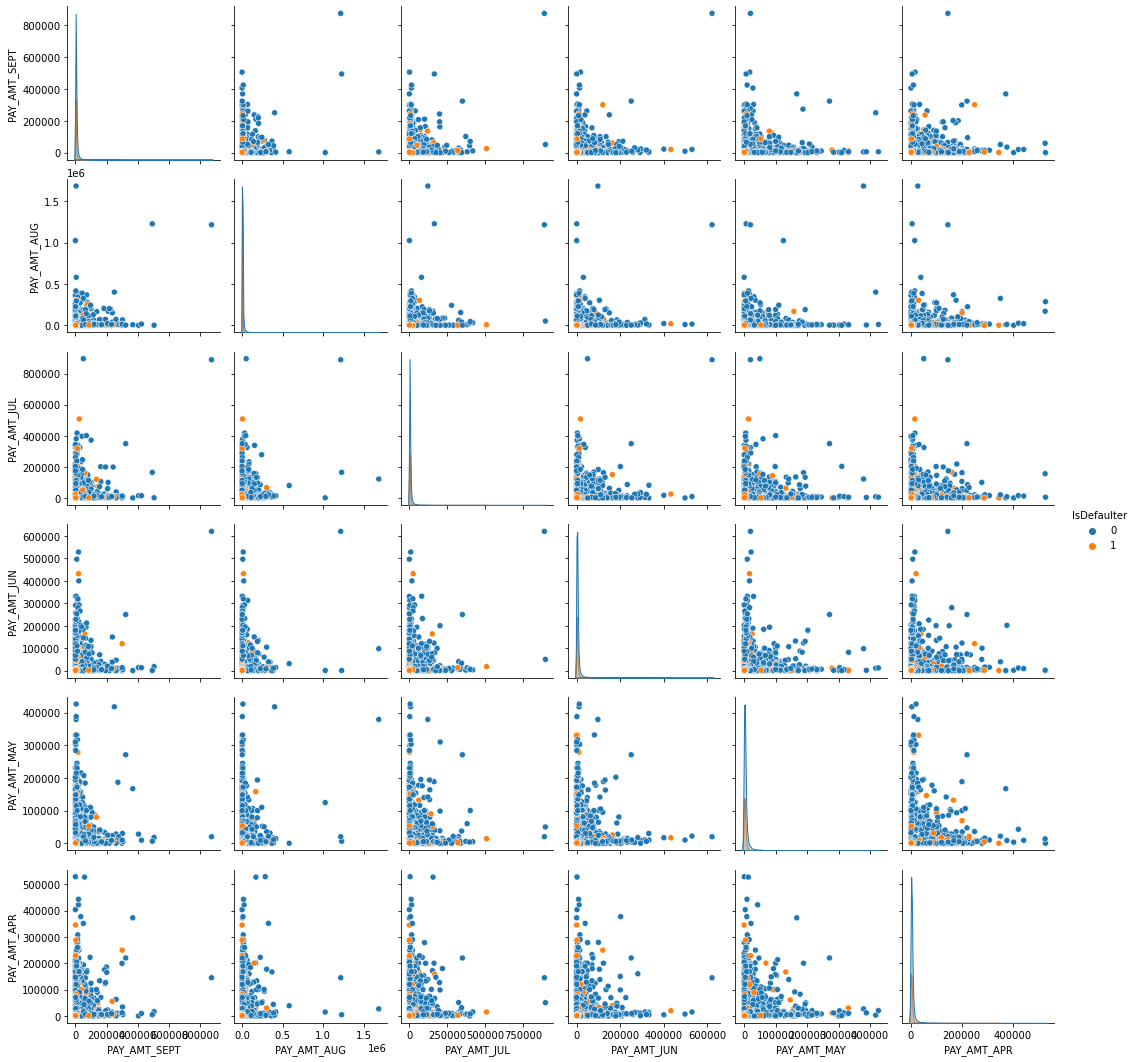

In [94]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [96]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: IsDefaulter, Length: 46728, dtype: int32

In [97]:
columns = list(df.columns)

In [98]:
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'default.payment.next.month',
 'IsDefaulter']

In [99]:
columns.pop()

'IsDefaulter'

In [100]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [101]:
balance_df['IsDefaulter'] = y_smote

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

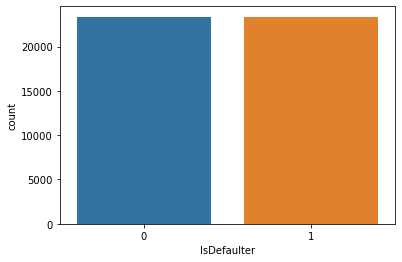

In [102]:
sns.countplot('IsDefaulter', data = balance_df)

In [103]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,1
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,13814,50000,1,1,1,48,0,0,0,0,...,10134,10399,1096,1956,500,2569,2251,1527,1,1
46724,10188,490830,1,1,1,43,0,0,0,0,...,4222,12604,6598,5609,2958,3157,11477,1535,1,1
46725,7020,50000,2,2,1,23,1,0,0,0,...,26650,27324,2000,2690,1458,4212,2391,2216,1,1
46726,10250,141190,1,1,1,45,0,0,0,0,...,95712,85135,5274,4888,3641,7587,88313,2731,1,1


# Feature Engineering

In [104]:
df_fr = balance_df.copy()

In [105]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] \
                            + df_fr['PAY_APR']

In [106]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.98014
1    1.68169
Name: Payement_Value, dtype: float64

<AxesSubplot:xlabel='IsDefaulter', ylabel='Payement_Value'>

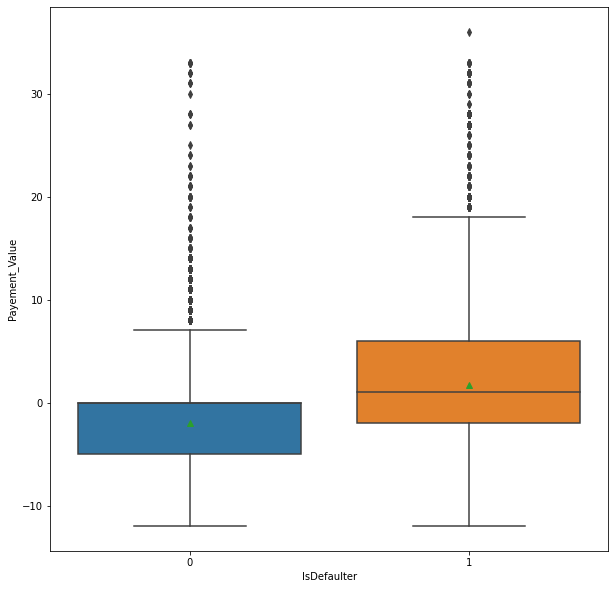

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value',showmeans=True)

In [108]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default.payment.next.month', 'IsDefaulter'],
      dtype='object')

In [110]:
sorts=df_fr['Payement_Value'].sort_values()
sorts

23363   -12
27273   -12
27270   -12
27266   -12
27265   -12
         ..
2916     33
2362     33
18867    33
831      33
8654     36
Name: Payement_Value, Length: 46728, dtype: int32

In [111]:
q1=sorts.quantile(0.25)
q3=sorts.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: -4.0
The value of q3 is: 2.0


In [112]:
q1=sorts.quantile(0.25)
q3=sorts.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: -4.0
The value of q3 is: 2.0


In [113]:
iqr = q3 - q1
print("The value of iqr is:",iqr)

The value of iqr is: 6.0


In [114]:
upper=q1-1.5*iqr
lower=q3+1.5*iqr

print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))

The value of upper bound is: -13
The value of lower bound is: 11


In [115]:
clean_data=sorts[~((sorts<(upper))  |  (sorts>(lower)))]
clean_data

23363   -12
27273   -12
27270   -12
27266   -12
27265   -12
         ..
37106    11
43346    11
32872    11
42371    11
5444     11
Name: Payement_Value, Length: 44769, dtype: int32

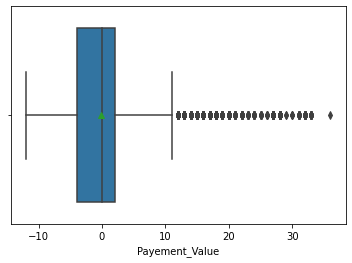

In [122]:
sns.boxplot(data=df_fr,x='Payement_Value',showmeans=True)
plt.show()

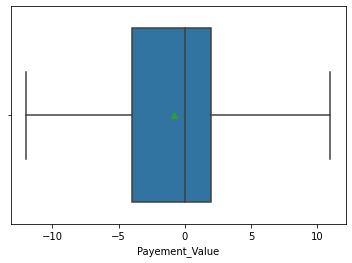

In [121]:
sns.boxplot(x=clean_data,showmeans=True)
plt.show()

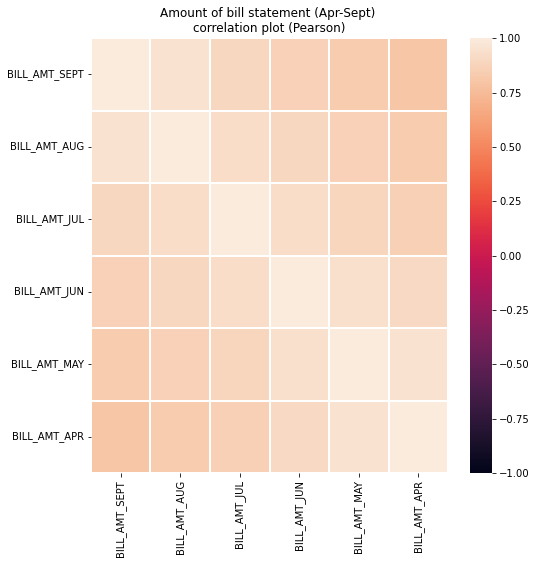

In [57]:
var = ['BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

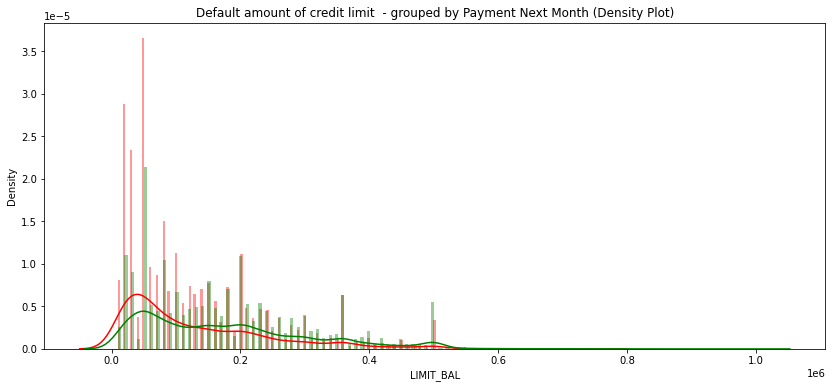

In [54]:
class_0 = df.loc[df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [56]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default.payment.next.month', 'IsDefaulter'],
      dtype='object')

In [59]:
gender = df.groupby(['SEX', 'IsDefaulter']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

IsDefaulter,0,1
SEX,,
1,9015,2873
2,14349,3763


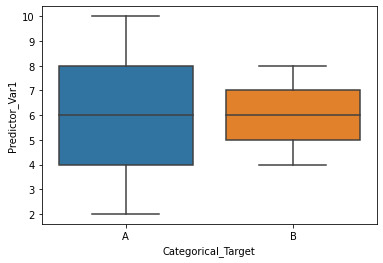

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example predictor variables and target variable
predictor_var1 = [2, 4, 6, 8, 10]
predictor_var2 = [1, 3, 5, 7, 9]
categorical_target = ['A', 'B', 'A', 'B', 'A']

# Create a DataFrame with the variables
data = pd.DataFrame({'Predictor_Var1': predictor_var1, 
                     'Predictor_Var2': predictor_var2, 
                     'Categorical_Target': categorical_target})

# Create a boxplot using seaborn
sns.boxplot(x='Categorical_Target', y='Predictor_Var1', data=data)
plt.show()


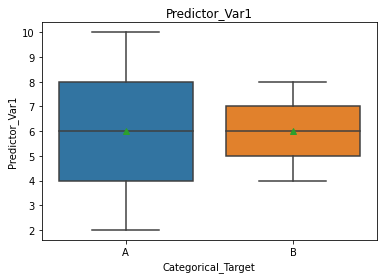

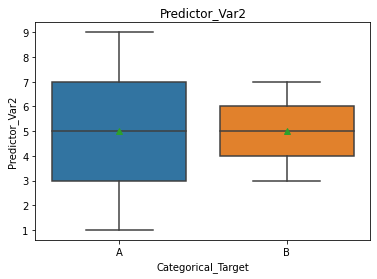

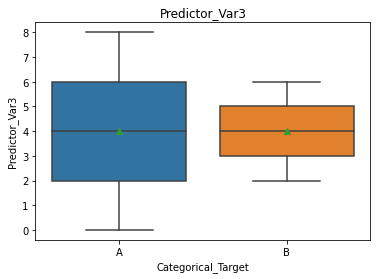

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example predictor variables and target variable
predictor_vars = {
    'Predictor_Var1': [2, 4, 6, 8, 10],
    'Predictor_Var2': [1, 3, 5, 7, 9],
    'Predictor_Var3': [0, 2, 4, 6, 8]
}
categorical_target = ['A', 'B', 'A', 'B', 'A']

# Create a DataFrame with the variables
data = pd.DataFrame(predictor_vars)
data['Categorical_Target'] = categorical_target

# Create boxplots for each predictor variable
for var in predictor_vars:
    plt.figure()
    sns.boxplot(x='Categorical_Target', y=var, data=data,showmeans=True)
    plt.title(var)
    plt.show()


In [128]:
import pandas as pd
from scipy.stats import chi2_contingency

# Exemple de jeu de données avec des variables catégorielles
data = pd.DataFrame({'Caractéristique1': ['A', 'B', 'A', 'B', 'A'],
                     'Caractéristique2': ['X', 'Y', 'X', 'Y', 'X'],
                     'Cible': [1, 0, 1, 0, 1]})

# Créer une table de contingence
table_contingence = pd.crosstab(data['Caractéristique1'], data['Caractéristique2'])

# Effectuer le test du chi2
chi2, p_value, _, _ = chi2_contingency(table_contingence)

# Afficher les résultats
print("Valeur du chi2 :", chi2)
print("Valeur p :", p_value)


Valeur du chi2 : 1.7013888888888888
Valeur p : 0.1921064408679386


In [1]:
import pandas as pd

# Exemple de données
data = {
    'colonne_a_modifier': ['123', '4567', '89', '987654321', '12']
}

# Charger les données dans un DataFrame
df = pd.DataFrame(data)

# Fonction pour ajouter des zéros
def ajouter_zeros(valeur):
    zeros_a_ajouter = 9 - len(valeur)
    return '0' * zeros_a_ajouter + valeur

# Appliquer la fonction sur la colonne spécifiée
colonne_a_modifier = 'colonne_a_modifier'
df[colonne_a_modifier] = df[colonne_a_modifier].apply(ajouter_zeros)

# Afficher le résultat
print(df)


  colonne_a_modifier
0          000000123
1          000004567
2          000000089
3          987654321
4          000000012


In [2]:
import pandas as pd

# Exemple de données avec une colonne "ma_colonne" contenant des valeurs
data = {
    "ma_colonne": [123, 4567, 89, 12345678, 98765432]
}

# Création du DataFrame à partir des données
df = pd.DataFrame(data)

# Fonction pour ajouter des zéros à gauche jusqu'à atteindre une taille de 9
def ajouter_zeros(valeur):
    return str(valeur).zfill(9)

# Appliquer la fonction "ajouter_zeros" à la colonne "ma_colonne"
df["ma_colonne"] = df["ma_colonne"].apply(ajouter_zeros)

# Afficher le DataFrame après avoir ajouté des zéros
print(df)


  ma_colonne
0  000000123
1  000004567
2  000000089
3  012345678
4  098765432


In [8]:
# Example string
my_string = "Hello"

# Add spaces to the right until the string reaches a length of 10
padded_string = my_string.rjust(10,'0')

print(padded_string)  # Output: "Hello     "

00000Hello


# DT method

In [127]:
import pandas as pd
import numpy as np

# Générer des données aléatoires
np.random.seed(42)
n_samples = 1000

data = {
    'id': range(1, n_samples + 1),
    'date_arrete': pd.date_range(start='2020-01-01', periods=n_samples, freq='M'),
    'annee': np.random.randint(2020, 2023, size=n_samples),
    'mois': np.random.randint(1, 13, size=n_samples),
    'age': np.random.randint(20, 70, size=n_samples),
    'anciennete_bancaire_mois': np.random.randint(6, 240, size=n_samples),
    'situation_matrimoniale': np.random.choice(['Célibataire', 'Marié', 'Divorcé', 'Veuf'], size=n_samples),
    'solde_fin_mois': np.random.uniform(-5000, 50000, size=n_samples),
    'nb_pret': np.random.randint(0, 5, size=n_samples),
    'cumul_crediteur': np.random.uniform(0, 100000, size=n_samples),
    'cumul_debiteur': np.random.uniform(0, 100000, size=n_samples),
    'salaire': np.random.uniform(1000, 10000, size=n_samples),
    'mtn_paiement_par_carte': np.random.uniform(0, 5000, size=n_samples),
    'nb_paiement_par_carte': np.random.randint(0, 50, size=n_samples),
    'nb_virement': np.random.randint(0, 20, size=n_samples),
    'mnt_virement': np.random.uniform(0, 20000, size=n_samples),
    'nb_versement': np.random.randint(0, 10, size=n_samples),
    'mtn_versement': np.random.uniform(0, 10000, size=n_samples),
    'mtn_paye': np.random.uniform(0, 10000, size=n_samples),
    'mtn_impaye': np.random.uniform(0, 10000, size=n_samples),
    'target': np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])
}

# Créer le DataFrame
df = pd.DataFrame(data)

print(df.shape)

# Afficher les premières lignes du DataFrame
df.head()


(1000, 21)


,id,date_arrete,annee,mois,age,anciennete_bancaire_mois,situation_matrimoniale,solde_fin_mois,nb_pret,cumul_crediteur,...,salaire,mtn_paiement_par_carte,nb_paiement_par_carte,nb_virement,mnt_virement,nb_versement,mtn_versement,mtn_paye,mtn_impaye,target
0,1,2020-01-31,2022,7,56,52,Célibataire,3954.827732,1,76944.257942,...,5294.317384,1149.591854,32,15,5235.057381,9,8444.056123,9535.722238,6268.536213,0
1,2,2020-02-29,2020,3,51,83,Veuf,5280.294233,4,93479.551749,...,2177.930247,2579.729393,32,9,10251.818505,0,4532.997386,8396.244959,736.182615,0
2,3,2020-03-31,2022,3,60,129,Veuf,-3911.238791,3,90920.213621,...,3120.093411,1267.468766,43,16,6612.016199,0,7264.413581,4260.008105,1896.963649,0
3,4,2020-04-30,2022,8,22,80,Divorcé,16487.516104,4,81962.486955,...,9392.535578,4702.686506,19,0,17210.229732,6,955.362076,6447.168378,3378.538857,0
4,5,2020-05-31,2020,5,47,108,Divorcé,5528.522427,2,88819.134966,...,8735.526781,4529.719840,46,17,9475.203075,2,3960.243463,1770.709219,778.700643,0


# I-scope of the study

# Dictionnaire de donnee :
anciennete_bancaire_mois = Chaque valeur représente le nombre de mois pendant lesquels un individu a été client de la banque

### D **Population et Échantillon :
** Spécifiez la population ou le groupe sur lequel portera votre étude. Si vous étudiez un sous-ensemble de la population (échantillon), expliquez comment vous sélectionnerez les participants.

### Limitations Géographiques et Temporelles :
** Indiquez toute limitation géographique ou temporelle. Par exemple, vous pourriez vous concentrer sur une région ou une période spécifique.

### **Méthodologie :
** Mentionnez brièvement les méthodes de recherche que vous utiliserez pour collecter et analyser les données. S'agira-t-il de méthodes qualitatives, quantitatives ou de méthodes mixtes ?

### **Éléments Exclus :
** Soyez clair sur ce que vous ne couvrirez pas dans votre étude. Cela évite le débordement du champ d'étude et maintient la concentration sur vos objectifs principaux.

### 8. **Résultats Attendus :
** Décrivez ce que vous avez l'intention de produire en résultat de votre étude. Il peut s'agir d'un rapport, d'une analyse, de recommandations ou d'autres résultats.

#### 9. **Prémisses et Limitations :
** Reconnaissez les prémisses que vous faites et les limitations qui pourraient affecter les résultats de l'étude.

### 10. **Signification :** Mettez en évidence pourquoi votre étude est importante et comment elle contribue aux connaissances existantes ou comble une lacune dans le domaine.

## A).  L'objectif de cette recherche:
est d'élaborer un modèle de scoring comportemental basé sur des données financières et comportementales des clients. 
Les principaux objectifs de cette étude sont les suivants :

Développer un Modèle de Scoring : Concevoir et construire un modèle prédictif qui évalue le comportement financier des clients et attribue un score en fonction de leurs antécédents de paiement, d'endettement, de dépenses et d'autres facteurs pertinents.

1. **Évaluer le Risque de Défaut :** L'objectif principal du scoring comportemental est d'évaluer le risque de défaut d'un individu ou d'une entité. Cela implique de développer un modèle qui peut prédire avec précision la probabilité qu'un emprunteur ou un client ne parvienne pas à rembourser ses dettes.

2. **Identifer les Facteurs de Risque :** Examiner les variables et les caractéristiques qui ont un impact significatif sur le comportement de remboursement. Cela peut inclure des variables telles que l'historique de paiement, le montant des dettes, l'ancienneté bancaire, etc.

3. **Optimiser les Décisions de Crédit :** Utiliser les scores comportementaux pour prendre des décisions éclairées en matière de crédit. Les scores peuvent aider les prêteurs à déterminer les limites de crédit appropriées, à évaluer la solvabilité et à personnaliser les offres de produits financiers.

4. **Améliorer la Gestion des Risques :** Fournir aux institutions financières un outil pour gérer efficacement les risques associés aux prêts et aux crédits. Cela peut conduire à des politiques de prêt plus ciblées et à une réduction des pertes.

5. **Suivre les Comportements Financiers :** Suivre l'évolution des comportements de paiement des clients au fil du temps. Cela peut aider à détecter les signes précoces de difficultés financières et à prendre des mesures correctives.

6. **Personnalisation des Offres :** Utiliser les scores comportementaux pour personnaliser les offres et les services financiers en fonction du profil et des habitudes de paiement de chaque individu.

7. **Améliorer la Rentabilité :** En réduisant les risques de défaut et en prenant des décisions plus précises en matière de crédit, les institutions financières peuvent améliorer leur rentabilité globale.

8. **Validation et Ajustements du Modèle :** Les objectifs incluent la validation et l'ajustement constants du modèle de scoring pour garantir sa précision et sa pertinence dans un environnement financier en évolution.

# II- data variables first analysis
  ---------------boxplot pour voir la reartitions des données, taux de missing, considerer que les tzrget detecter

Q1 (premier quartile) : Le premier quartile divise les données en deux parties égales, où 25% des valeurs se situent en dessous de Q1. Cela signifie que 25% des données sont inférieures à Q1. 
 
Q2 (deuxième quartile) : Q2 est simplement une autre appellation pour la médiane. Il divise les données en deux parties égales, où 50% des valeurs se situent en dessous de Q2 et 50% des valeurs se situent au-dessus de Q2. 
 
Q3 (troisième quartile) : Le troisième quartile divise les données en deux parties égales, où 75% des valeurs se situent en dessous de Q3. Cela signifie que 25% des données sont supérieures à Q3

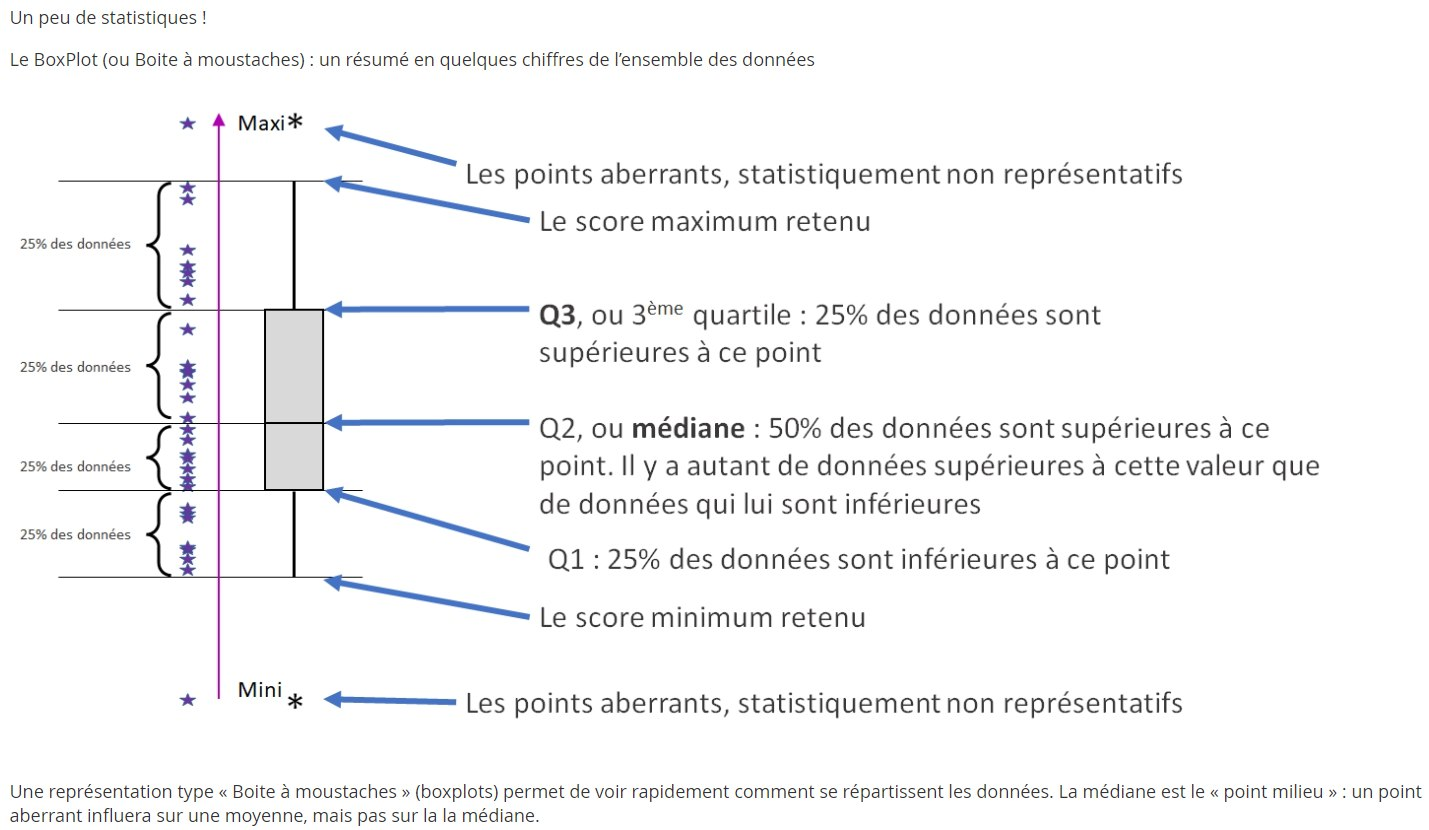

In [23]:
from IPython.display import Image
Image(filename='img.jpg')

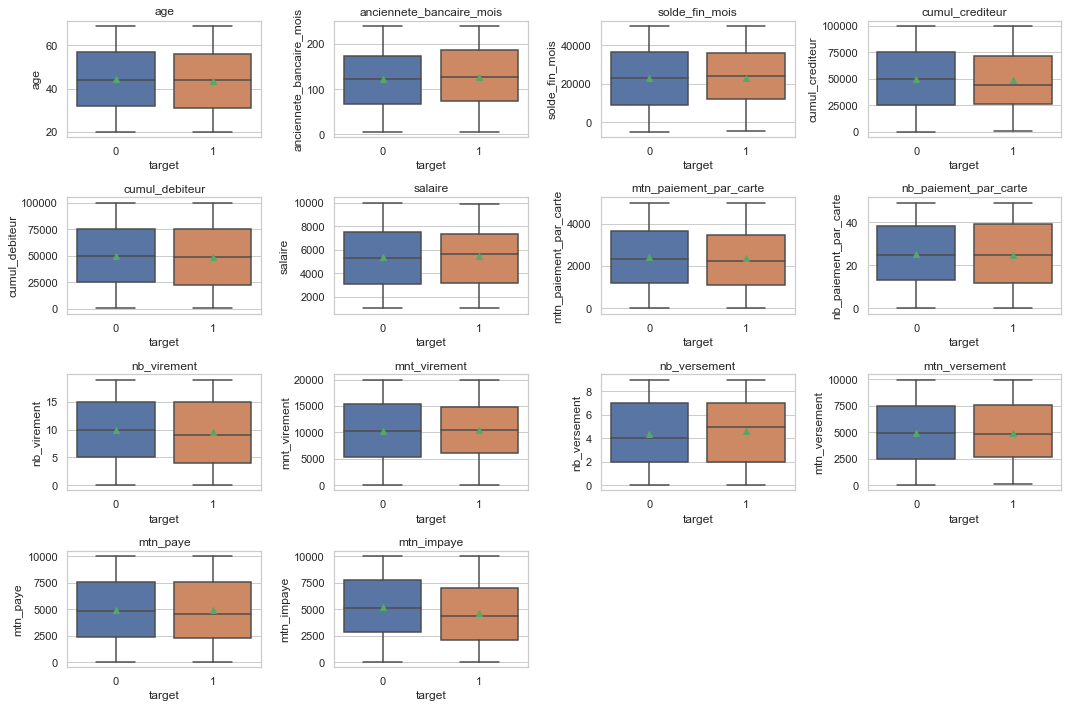

In [261]:
# Grouper les données par la variable cible 'target'
grouped = df.groupby('target')

# Comparer les moyennes des variables numériques pour les deux groupes
numeric_vars = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'cumul_crediteur', 'cumul_debiteur', 'salaire',
                'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement', 'mnt_virement', 'nb_versement',
                'mtn_versement', 'mtn_paye', 'mtn_impaye']

plt.figure(figsize=(15, 10))
for var in numeric_vars:
    plt.subplot(4, 4, numeric_vars.index(var) + 1)
    sns.boxplot(data=df, x='target', y=var,showmeans=True)
    plt.title(var)
plt.tight_layout()
plt.show()


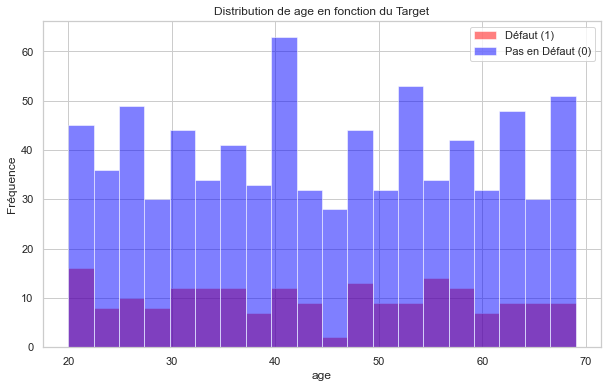

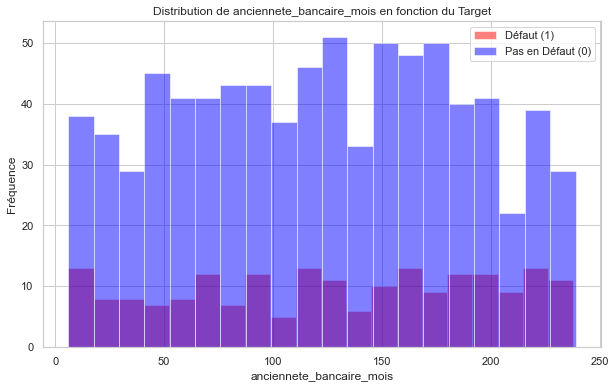

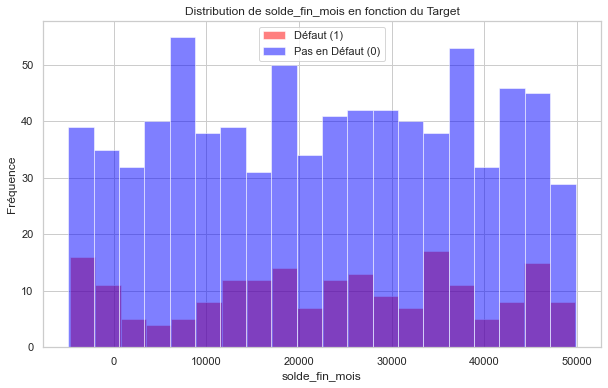

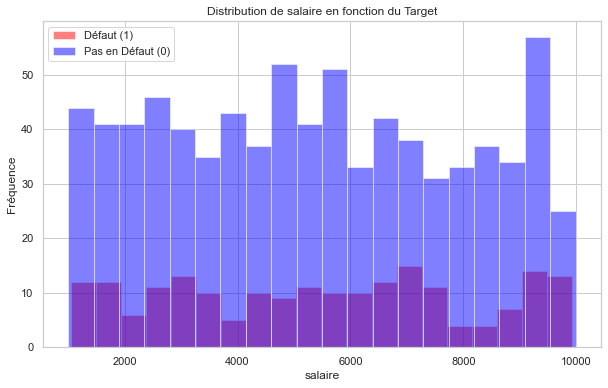

In [262]:
# Variables numériques que vous souhaitez analyser
numeric_variables = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'salaire']

# Boucle pour créer des histogrammes pour chaque variable numérique
for variable in numeric_variables:
    plt.figure(figsize=(10, 6))
    
    # Histogramme pour les clients en défaut (target = 1)
    plt.hist(df[df['target'] == 1][variable], bins=20, color='red', alpha=0.5, label='Défaut (1)')
    
    # Histogramme pour les clients non en défaut (target = 0)
    plt.hist(df[df['target'] == 0][variable], bins=20, color='blue', alpha=0.5, label='Pas en Défaut (0)')
    
    plt.title(f'Distribution de {variable} en fonction du Target')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.legend()
    plt.grid(True)
    plt.show()


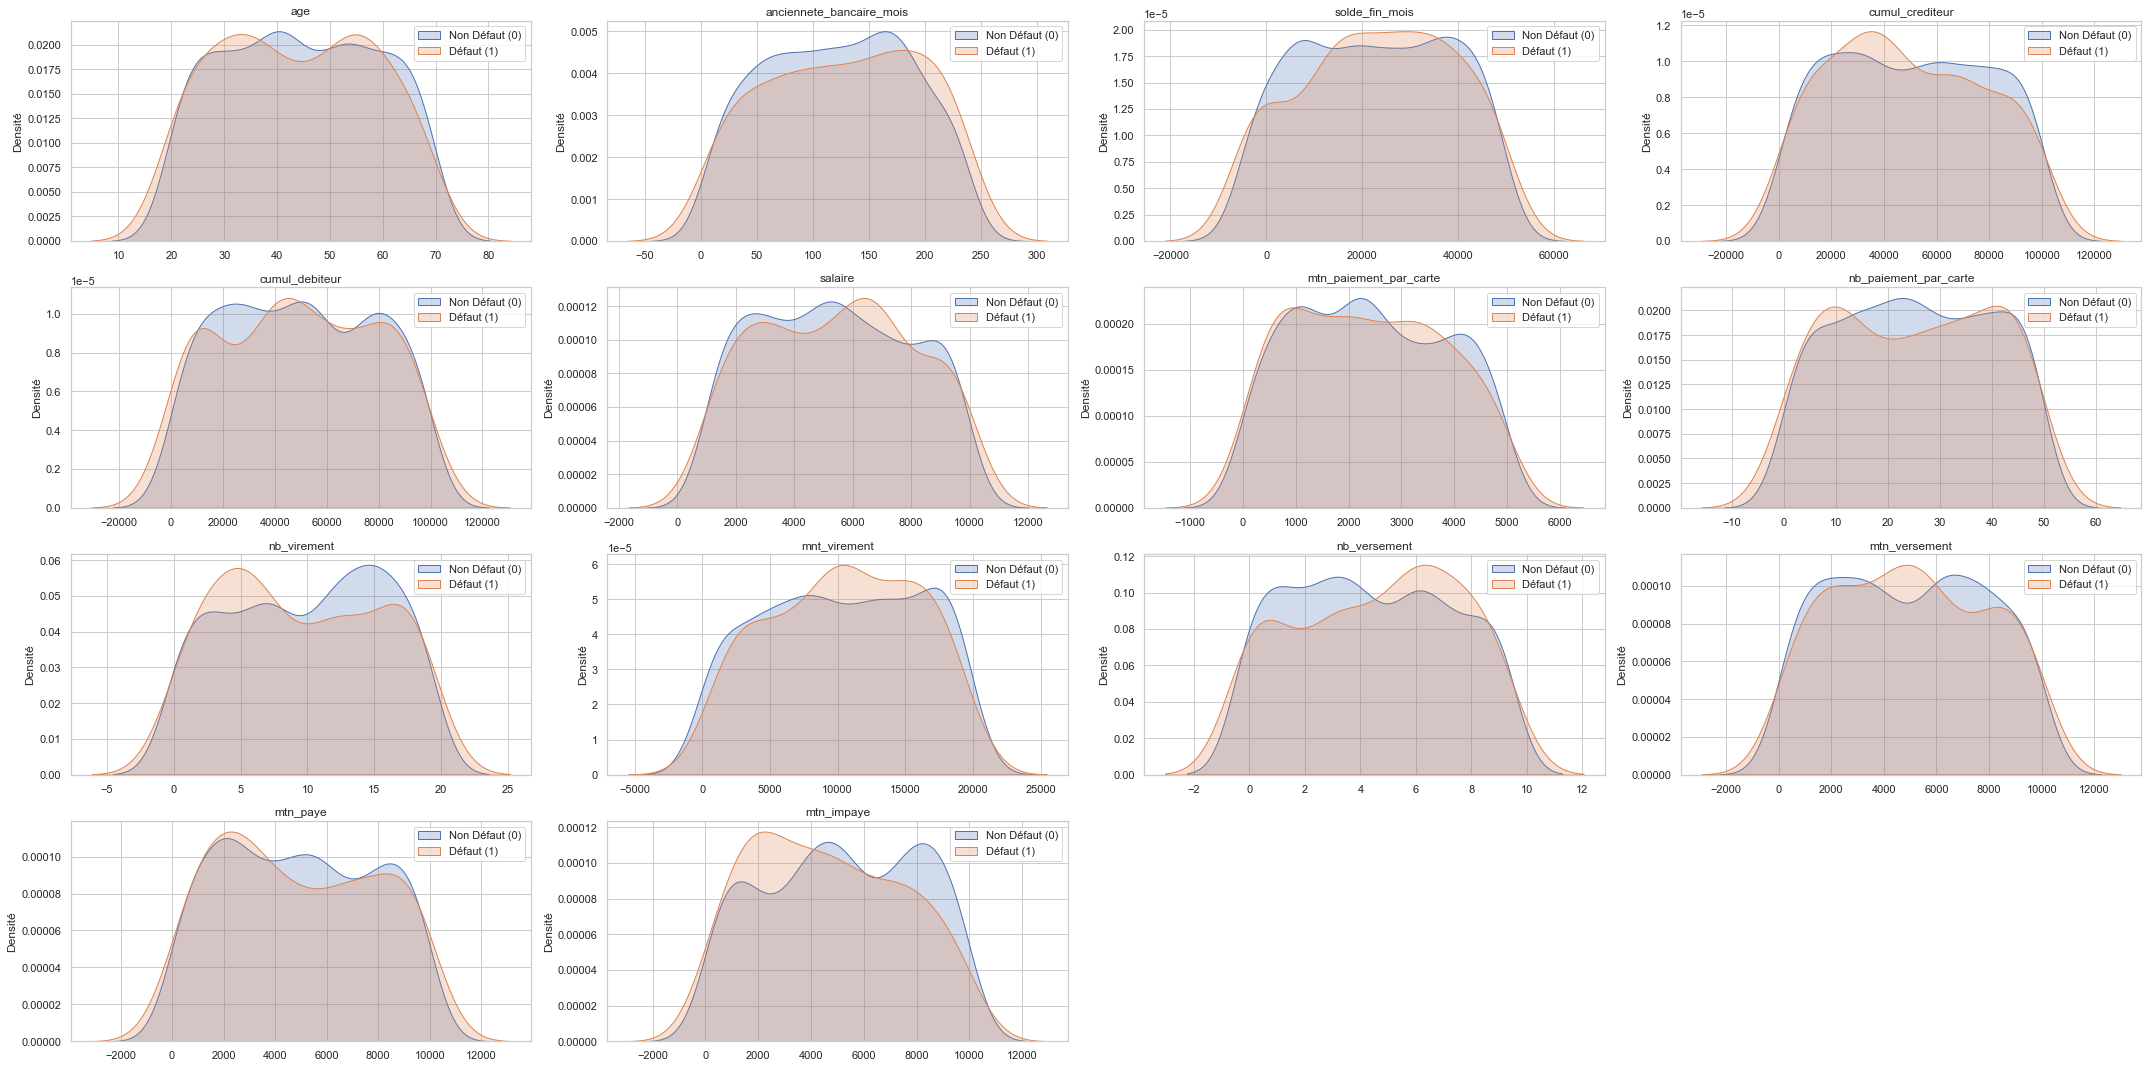

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer les données en fonction du target
df_target_0 = df[df['target'] == 0]
df_target_1 = df[df['target'] == 1]

# Liste des colonnes numériques à visualiser
numeric_columns = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'cumul_crediteur', 'cumul_debiteur', 'salaire', 'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement', 'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye', 'mtn_impaye']

# Ajuster la taille du graphique
plt.figure(figsize=(30, 15))

# Tracer les courbes de densité de probabilité pour chaque variable numérique
for col in numeric_columns:
    plt.subplot(4, 4, numeric_columns.index(col) + 1)  # Créer une grille 4x4 de sous-graphiques
    sns.kdeplot(data=df_target_0[col], label='Non Défaut (0)', shade=True)
    sns.kdeplot(data=df_target_1[col], label='Défaut (1)', shade=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Densité')
    plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


In [277]:
df.columns

Index(['id', 'date_arrete', 'annee', 'mois', 'age', 'anciennete_bancaire_mois',
       'situation_matrimoniale', 'solde_fin_mois', 'nb_pret',
       'cumul_crediteur', 'cumul_debiteur', 'salaire',
       'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement',
       'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye',
       'mtn_impaye', 'target', 'anciennete_bancaire_range', 'dettes_cumulees',
       'paiement_anormaux', 'salaire_range', 'age_group', 'constante'],
      dtype='object')

# key figures

In [279]:
import pandas as pd

# Charger le DataFrame depuis le code que vous avez fourni
# Assurez-vous que le DataFrame 'df' est déjà créé

# Grouper par année et target, puis calculer les statistiques
grouped_stats = df.groupby(['annee', 'target'])[['cumul_crediteur', 'cumul_debiteur', 'solde_fin_mois', 'salaire']].describe()

# Afficher les statistiques
grouped_stats

cumul_crediteur                                            \
                       count          mean           std           min   
annee target                                                             
2020  0                 10.0  60315.049538  29259.192734  19921.968584   
      1                  2.0  26846.684718  15356.532663  15987.976337   
2021  0                 12.0  45292.131517  24051.312095   8744.650180   
2022  0                  9.0  32191.769939  32781.744437   3981.143945   
      1                  3.0  75124.645335  34548.672821  35232.705425   
...                      ...           ...           ...           ...   
2101  1                  4.0  51578.167060  39272.706928  13574.585310   
2102  0                  9.0  50631.868072  34701.808267   8839.696715   
      1                  3.0  29821.051703  17256.175426  10015.499751   
2103  0                  3.0  65785.477335  43344.788587  16653.851350   
      1                  1.0  28147.730245           NaN  28147.730245   

                                                                      \
                       25%           50%           75%           max   
annee target                                                           
2020  0       31505.656129  65699.895204  87104.972963  93479.551749   
      1       21417.330528  26846.684718  32276.038909  37705.393100   
2021  0       27462.299640  45843.083045  65696.243325  79644.056152   
2022  0       10868.253937  17909.493933  39221.779343  95564.946727   
      1       65005.337611  94777.969797  95070.615290  95363.260783   
...                    ...           ...           ...           ...   
2101  1       23281.451916  46401.526441  74698.241584  99935.030047   
2102  0       27171.759890  34222.552478  81595.578942  98138.333424   
      1       23923.530234  37831.560717  39723.827679  41616.094641   
2103  0       49369.376138  82084.900926  90351.290327  98617.679728   
      1       28147.730245  28147.730245  28147.730245  28147.730245   

             cumul_debiteur                ... solde_fin_mois                \
                      count          mean  ...            75%           max   
annee target                               ...                                
2020  0                10.0  44480.163809  ...   18420.046223  46424.693751   
      1                 2.0  53489.980237  ...   36109.863440  43289.147334   
2021  0                12.0  58438.033623  ...   38007.930677  49012.724536   
2022  0                 9.0  48227.588614  ...   48740.732818  49469.898010   
      1                 3.0  14979.273329  ...   46040.097988  46769.984653   
...                     ...           ...  ...            ...           ...   
2101  1                 4.0  73539.594378  ...   10905.896644  12465.501893   
2102  0                 9.0  40720.993768  ...   36749.781291  45094.146903   
      1                 3.0  28675.429423  ...   30208.018952  35014.107662   
2103  0                 3.0  27962.971434  ...   26394.581561  35364.795735   
      1                 1.0  79554.439193  ...    1906.106825   1906.106825   

             salaire                                                      \
               count         mean          std          min          25%   
annee target                                                               
2020  0         10.0  5976.076397  2745.892826  2177.930247  3663.649404   
      1          2.0  9038.570957  1044.580366  8299.941097  8669.256027   
2021  0         12.0  5491.658173  2790.446199  1801.087614  2885.173975   
2022  0          9.0  5350.240096  3388.186533  1645.618094  2434.553963   
      1          3.0  3113.171707  1429.491544  2090.399151  2296.475381   
...              ...          ...          ...          ...          ...   
2101  1          4.0  4891.369035  3599.727571  1219.518938  2535.292443   
2102  0          9.0  4774.412869  3085.254252  1340.381229  3102.223908   
      1          3.0  17

In [299]:
import pandas as pd

# Charger le DataFrame depuis le code que vous avez fourni
# Assurez-vous que le DataFrame 'df' est déjà créé

# Sélectionner les colonnes d'intérêt
columns_of_interest = ['annee', 'cumul_crediteur', 'cumul_debiteur', 'mtn_paye', 'target']

# Filtrer les clients ayant des valeurs non nulles pour les cumuls créditeurs, débiteurs et montants payés
filtered_df = df[df['cumul_crediteur'] > 0.0]
filtered_df = filtered_df[filtered_df['cumul_debiteur'] > 0.0]
filtered_df = filtered_df[filtered_df['mtn_paye'] > 0.0]

# Grouper par année, target et compter le nombre de clients
grouped_counts = filtered_df.groupby(['annee', 'target']).size().reset_index(name='nombre_de_clients')

# Afficher les résultats
grouped_counts

,annee,target,nombre_de_clients
0,2020,0,10
1,2020,1,2
2,2021,0,12
3,2022,0,9
4,2022,1,3
...,...,...,...
157,2101,1,4
158,2102,0,9
159,2102,1,3
160,2103,0,3


In [293]:
# Créer un tableau croisé dynamique pour le nombre de clients par année et target
pivot_table = pd.pivot_table(df, values='id', index='annee', columns='target', aggfunc='count', fill_value=0)

# Renommer les colonnes du tableau
pivot_table.columns = ['Non Défaut (0)', 'Défaut (1)']

# Afficher le tableau
pivot_table

,Non Défaut (0),Défaut (1)
annee,,
2020,10,2
2021,12,0
2022,9,3
2023,11,1
2024,12,0
...,...,...
2099,9,3
2100,10,2
2101,8,4


In [311]:
df.columns

Index(['id', 'date_arrete', 'annee', 'mois', 'age', 'anciennete_bancaire_mois',
       'situation_matrimoniale', 'solde_fin_mois', 'nb_pret',
       'cumul_crediteur', 'cumul_debiteur', 'salaire',
       'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement',
       'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye',
       'mtn_impaye', 'target', 'anciennete_bancaire_range', 'dettes_cumulees',
       'paiement_anormaux', 'salaire_range', 'age_group', 'constante'],
      dtype='object')

In [305]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'df'

# Regrouper les données par année et par target, puis calculer la somme des montants cumulés dans chaque groupe
total_cumul_by_year = df.groupby(['annee', 'target'])['cumul_crediteur'].sum().reset_index()

# Renommer la colonne 'cumul_crediteur' en 'montant_total_cumul'
total_cumul_by_year.rename(columns={'cumul_crediteur': 'montant_total_cumul'}, inplace=True)

total_cumul_by_year


,annee,target,montant_total_cumul
0,2020,0,603150.495384
1,2020,1,53693.369437
2,2021,0,543505.578206
3,2022,0,289725.929447
4,2022,1,225373.936005
...,...,...,...
157,2101,1,206312.668239
158,2102,0,455686.812646
159,2102,1,89463.155108
160,2103,0,197356.432004


<Figure size 720x432 with 0 Axes>

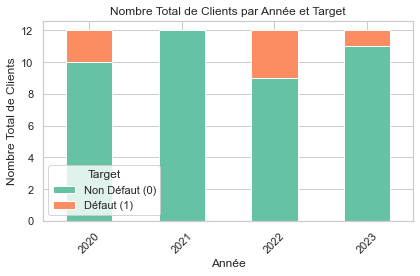

In [310]:
# Supposons que votre DataFrame s'appelle 'df'
data = df[df.annee.isin([2020, 2021, 2022, 2023])]

# Calculer le nombre total de clients par année et par target
total_clients_by_year = data.groupby(['annee', 'target'])['cumul_crediteur'].count().unstack()

# Définir un style esthétique avec Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Créer un graphique en barres pour le nombre total de clients par année et target
plt.figure(figsize=(10, 6))
total_clients_by_year.plot(kind='bar', stacked=True)
plt.title("Nombre Total de Clients par Année et Target")
plt.xlabel("Année")
plt.ylabel("Nombre Total de Clients")
plt.legend(title='Target', labels=['Non Défaut (0)', 'Défaut (1)'])
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter la superposition
plt.show()


In [313]:
# Regrouper les données par année et par target, puis calculer la somme des montants cumulés dans chaque groupe
grouped_data = data.groupby(['annee', 'target']).agg({
    'cumul_crediteur': 'sum',
    'mtn_paye': 'sum',
    'mtn_impaye': 'sum',
    'mnt_virement': 'sum',
    # Ajoutez d'autres colonnes si nécessaire
}).reset_index()

# Renommer les colonnes pour une meilleure lisibilité
grouped_data.rename(columns={
    'cumul_crediteur': 'Montant Total Cumulé',
    'mtn_paye': 'Montant Payé',
    'mtn_impaye': 'Montant Impayé',
    'mnt_virement': 'Montant Virement',
    # Ajoutez d'autres renommages de colonnes si nécessaire
}, inplace=True)

grouped_data


,annee,target,Montant Total Cumulé,Montant Payé,Montant Impayé,Montant Virement
0,2020,0,603150.495384,65073.306289,34852.180604,113969.874566
1,2020,1,53693.369437,15068.583344,12421.236445,17575.435891
2,2021,0,543505.578206,52487.103545,81360.849807,103705.814461
3,2022,0,289725.929447,57687.575657,48920.996739,108465.728662
4,2022,1,225373.936005,20287.244474,9023.106442,35387.837379
5,2023,0,670564.042057,57087.396730,45482.269067,109889.847172
6,2023,1,91764.727790,3429.351158,7477.652771,1772.659495


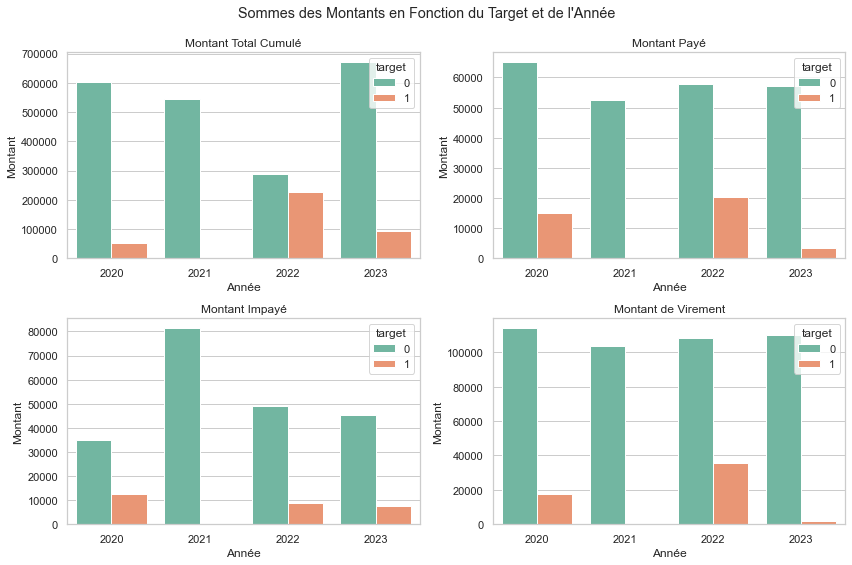

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle 'df'

# Regrouper les données par année et par target, puis calculer la somme des montants dans chaque groupe
grouped_data = data.groupby(['annee', 'target']).agg({
    'cumul_crediteur': 'sum',
    'mtn_paye': 'sum',
    'mtn_impaye': 'sum',
    'mnt_virement': 'sum'
}).reset_index()

# Définir un style esthétique avec Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Créer des sous-plots pour chaque montant en fonction du target et de l'année
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Sommes des Montants en Fonction du Target et de l'Année")

# Montant Total Cumulé
sns.barplot(data=grouped_data, x='annee', y='cumul_crediteur', hue='target', ax=axes[0, 0])
axes[0, 0].set_title("Montant Total Cumulé")
axes[0, 0].set_xlabel("Année")
axes[0, 0].set_ylabel("Montant")

# Montant Payé
sns.barplot(data=grouped_data, x='annee', y='mtn_paye', hue='target', ax=axes[0, 1])
axes[0, 1].set_title("Montant Payé")
axes[0, 1].set_xlabel("Année")
axes[0, 1].set_ylabel("Montant")

# Montant Impayé
sns.barplot(data=grouped_data, x='annee', y='mtn_impaye', hue='target', ax=axes[1, 0])
axes[1, 0].set_title("Montant Impayé")
axes[1, 0].set_xlabel("Année")
axes[1, 0].set_ylabel("Montant")

# Montant de Virement
sns.barplot(data=grouped_data, x='annee', y='mnt_virement', hue='target', ax=axes[1, 1])
axes[1, 1].set_title("Montant de Virement")
axes[1, 1].set_xlabel("Année")
axes[1, 1].set_ylabel("Montant")

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Afficher les graphiques
plt.show()


In [325]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'df'

# Créer une nouvelle colonne pour les classes de situation matrimoniale
def categorize_marital_status(status):
    if status in ['Divorcé', 'Veuf']:
        return 'Divorcé/Veuf'
    elif status == 'Célibataire':
        return 'Célibataire'
    elif status == 'Marié':
        return 'Marié'
    else:
        return 'Autre'  # Vous pouvez gérer d'autres valeurs si nécessaire

data['marital_status_group'] = data['situation_matrimoniale'].apply(categorize_marital_status)

# Regrouper les données par année, par classe de situation matrimoniale et par target, puis compter le nombre de clients dans chaque groupe
grouped_data = df.groupby(['annee', 'marital_status_group', 'target'])['id'].count().unstack().reset_index()

grouped_data

target,annee,marital_status_group,0,1
0,2020,Célibataire,2.0,1.0
1,2020,Divorcé/Veuf,7.0,NaN
2,2020,Marié,1.0,1.0
3,2021,Célibataire,2.0,NaN
4,2021,Divorcé/Veuf,6.0,NaN
5,2021,Marié,4.0,NaN
6,2022,Célibataire,NaN,2.0
7,2022,Divorcé/Veuf,6.0,NaN
8,2022,Marié,3.0,1.0
9,2023,Célibataire,2.0,NaN


In [318]:
df.situation_matrimoniale.unique()

array(['Divorcé', 'Célibataire', 'Marié', 'Veuf'], dtype=object)

## B).Questions de recherche :

1. **Quelles variables comportementales ont le plus d'impact sur la prédiction du risque de défaut ?** = ML
2. **Comment les profils de remboursement varient-ils en fonction de l'état matrimonial des emprunteurs ?**
    Le comportement de paiement diffère-t-il entre les différents segments de clients (par exemple, célibataires, mariés, divorcés) ?
3. **Existe-t-il une corrélation entre l'ancienneté bancaire et la probabilité de défaut de paiement ?**
4. **Comment les comportements de paiement évoluent-ils au fil du temps, et quels sont les signes précurseurs de problèmes financiers ?**
5. **Quel est l'effet des montants des dettes cumulées sur la capacité à rembourser les crédits ?**
    L'effet des montants de dettes cumulées sur la capacité à rembourser les crédits peut avoir des implications significatives pour la solvabilité d'un individu. En termes simples, cela se réfère à la question de savoir comment le total des dettes qu'une personne a accumulées peut influencer sa capacité à honorer ses engagements financiers, tels que les remboursements de crédits.
    Imaginons un scénario où un individu a accumulé un montant élevé de dettes provenant de différents prêts, cartes de crédit ou autres obligations financières. Plus ce montant de dettes cumulées est élevé, plus il peut y avoir de pression sur les ressources financières de cette personne
    
6. **Dans quelle mesure les comportements de paiement passés peuvent-ils prédire les comportements futurs en matière de crédit ?**
7. **Quelles sont les différences de comportement entre les clients qui ont fait défaut et ceux qui n'ont pas fait défaut ?**
8. **Comment le niveau de revenu (représenté par le salaire) influence-t-il la probabilité de défaut de paiement ?**
9. XxxxXxxx**Les habitudes de paiement par carte (montant et fréquence) sont-elles liées à la performance de remboursement ?**
 
10. **Comment les comportements financiers varient-ils en fonction de l'âge des emprunteurs ?**
11. XXXX**Les emprunteurs ayant déjà contracté des prêts multiples ont-ils tendance à être plus risqués en termes de remboursement ?**
12. **Y a-t-il des saisons ou des périodes de l'année où les défauts de paiement sont plus fréquents ?**
13. **Comment les modèles de scoring comportemental diffèrent-ils selon les années étudiées (2020 à 2022) ?**
14. **Quelles caractéristiques des emprunteurs ont le plus grand impact sur le score de crédit ?**
15. **Dans quelle mesure les comportements de paiement passés affectent-ils la probabilité de défaut ?**


2. **Comment les profils de remboursement varient-ils en fonction de l'état matrimonial des emprunteurs ?**14. **Quelles caractéristiques des emprunteurs ont le plus grand impact sur le score de crédit ?**

- **Célibataire (Single):** Le taux de défaut moyen pour les personnes célibataires est d'environ 20.91%. Cela signifie que parmi les emprunteurs célibataires, environ 20.91% ont tendance à ne pas rembourser leurs crédits en temps voulu.

- **Divorcé (Divorced):** Les emprunteurs divorcés ont un taux de défaut moyen d'environ 20.65%. Cela indique qu'environ 20.65% des personnes divorcées ont des difficultés à honorer leurs obligations de paiement.

- **Marié (Married):** Les personnes mariées ont un taux de défaut moyen d'environ 21.37%. Cela implique que près de 21.37% des emprunteurs mariés ne remboursent pas leurs crédits de manière adéquate.

- **Veuf (Widowed):** Les emprunteurs veufs affichent un taux de défaut moyen d'environ 19.14%. Cela suggère que 19.14% des personnes veuves connaissent des problèmes de remboursement.

En interprétant ces résultats, on peut dire qu'il y a des différences légères entre les taux de défaut moyens pour différents groupes d'état matrimonial. Cependant, les variations ne semblent pas être très prononcées. En substance, les taux de défaut ne varient pas considérablement en fonction de l'état matrimonial des emprunteurs dans cet ensemble de données. Cela suggère que l'état matrimonial seul pourrait ne pas être un facteur majeur dans la prédiction des comportements de remboursement, du moins dans le contexte de cette analyse.

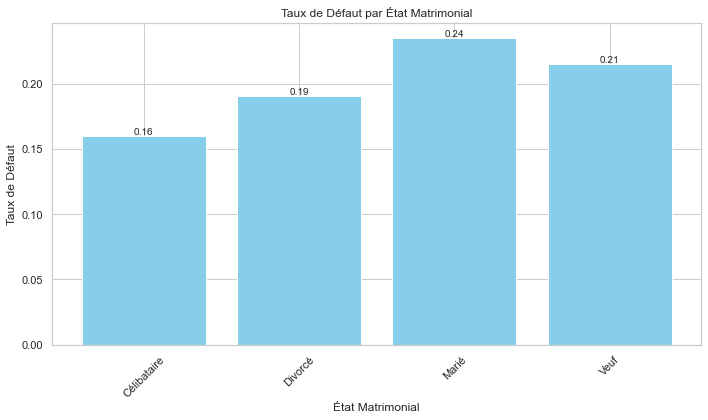

In [128]:
# Grouper les données par état matrimonial et calculer le taux de défaut moyen
grouped = df.groupby('situation_matrimoniale')['target'].mean().reset_index()

# Créer un graphique pour visualiser les variations avec les taux de défaut affichés sur les barres
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped['situation_matrimoniale'], grouped['target'], color='skyblue')
plt.title('Taux de Défaut par État Matrimonial')
plt.xlabel('État Matrimonial')
plt.ylabel('Taux de Défaut')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher les taux de défaut au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()


### 3. **Existe-t-il une corrélation entre l'ancienneté bancaire et la probabilité de défaut de paiement ?**

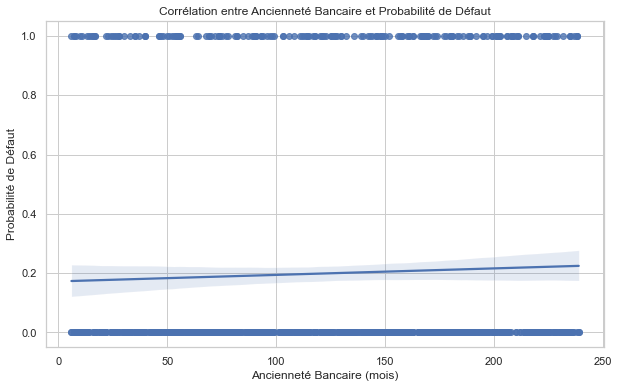

Corrélation entre Ancienneté Bancaire et Probabilité de Défaut : 0.0355


In [129]:
# Créer un graphique de dispersion et une ligne de régression pour visualiser la corrélation
plt.figure(figsize=(10, 6))
sns.regplot(x='anciennete_bancaire_mois', y='target', data=df)#, logistic=True)
plt.xlabel("Ancienneté Bancaire (mois)")
plt.ylabel("Probabilité de Défaut")
plt.title("Corrélation entre Ancienneté Bancaire et Probabilité de Défaut")
plt.show()

# Calculer la corrélation entre les deux variables
correlation = df['anciennete_bancaire_mois'].corr(df['target'])
print(f"Corrélation entre Ancienneté Bancaire et Probabilité de Défaut : {correlation:.4f}")


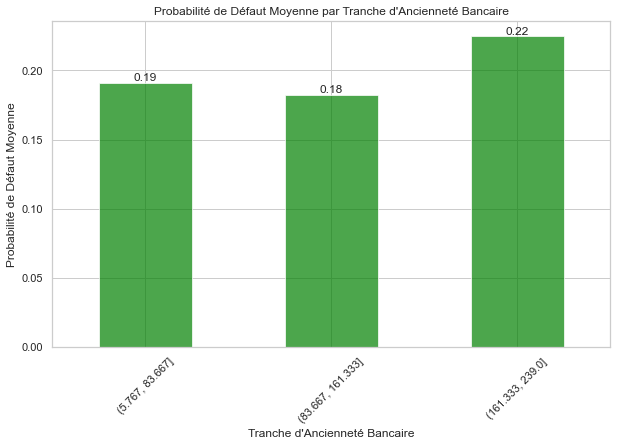

In [130]:
df['anciennete_bancaire_range'] = pd.cut(df['anciennete_bancaire_mois'], bins=3)
default_by_seniority = df.groupby('anciennete_bancaire_range')['target'].mean()

plt.figure(figsize=(10, 6))
bar_plot = default_by_seniority.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Tranche d\'Ancienneté Bancaire')
plt.ylabel('Probabilité de Défaut Moyenne')
plt.title('Probabilité de Défaut Moyenne par Tranche d\'Ancienneté Bancaire')
plt.xticks(rotation=45)

# Ajouter les annotations des probabilités moyennes sur les barres
for index, value in enumerate(default_by_seniority):
    bar_plot.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

plt.show()


### 4. **Comment les comportements de paiement évoluent-ils au fil du temps, et quels sont les signes précurseurs de problèmes financiers ?**

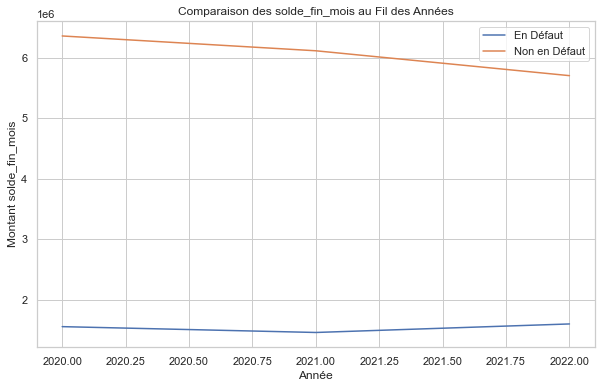

In [131]:
# Supposons que votre DataFrame a une colonne 'target' (1 pour défaut, 0 pour non-défaut)
data_defaut = df[df['target'] == 1]
data_non_defaut = df[df['target'] == 0]

# Analyse des paiements par carte au fil du temps pour chaque groupe
paiements_defaut = data_defaut.groupby('annee')['solde_fin_mois'].sum()
paiements_non_defaut = data_non_defaut.groupby('annee')['solde_fin_mois'].sum()

# Créez le graphique de ligne comparatif
plt.figure(figsize=(10, 6))
plt.plot(paiements_defaut.index, paiements_defaut.values, label='En Défaut')
plt.plot(paiements_non_defaut.index, paiements_non_defaut.values, label='Non en Défaut')
plt.xlabel('Année')
plt.ylabel('Montant solde_fin_mois')
plt.title('Comparaison des solde_fin_mois au Fil des Années')
plt.legend()
plt.grid(True)
plt.show()


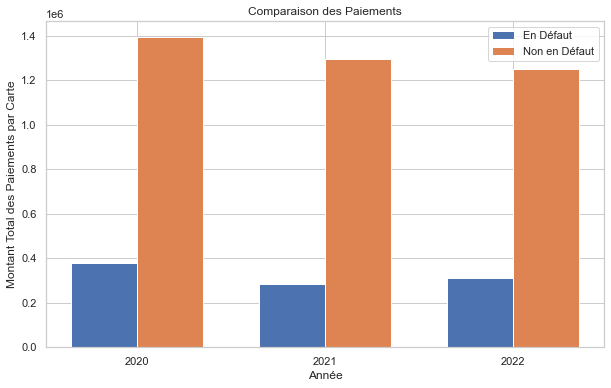

In [138]:
# Supposons que votre DataFrame a une colonne 'target' (1 pour défaut, 0 pour non-défaut)
data_defaut = df[df['target'] == 1]
data_non_defaut = df[df['target'] == 0]

# Calculez la somme des paiements par carte pour chaque année et chaque groupe
paiements_defaut = data_defaut.groupby(['annee'])['mtn_paye'].sum()
paiements_non_defaut = data_non_defaut.groupby(['annee'])['mtn_paye'].sum()

# Créez le graphique à barres comparatif
plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(paiements_defaut.index, paiements_defaut.values, width, label='En Défaut')
plt.bar(paiements_non_defaut.index + width, paiements_non_defaut.values, width, label='Non en Défaut')
plt.xlabel('Année')
plt.ylabel('Montant Total des Paiements par Carte')
plt.title('Comparaison des Paiements')
plt.xticks(paiements_defaut.index + width / 2, paiements_defaut.index)
plt.legend()
plt.grid(True)
plt.show()


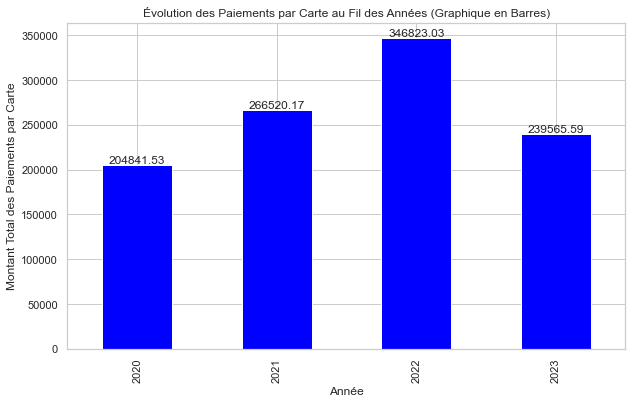

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame df avec une colonne 'annee' et une colonne 'mnt_paiement_par_carte'
data=df[df.annee.isin([2020,2021,2022,2023])]
# Regroupez les données par année et calculez la somme des paiements par carte pour chaque année
soldes_par_annee = data.groupby('annee')['solde_fin_mois'].sum()

# Créez le graphique en barres
plt.figure(figsize=(10, 6))
soldes_par_annee.plot(kind='bar', color='blue')

# Ajoutez des labels et un titre
plt.xlabel('Année')
plt.ylabel('Montant Total des Paiements par Carte')
plt.title('Évolution des Paiements par Carte au Fil des Années (Graphique en Barres)')

# Afficher les valeurs numériques au-dessus de chaque barre
for index, value in enumerate(soldes_par_annee):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

# Affichez le graphique
plt.show()

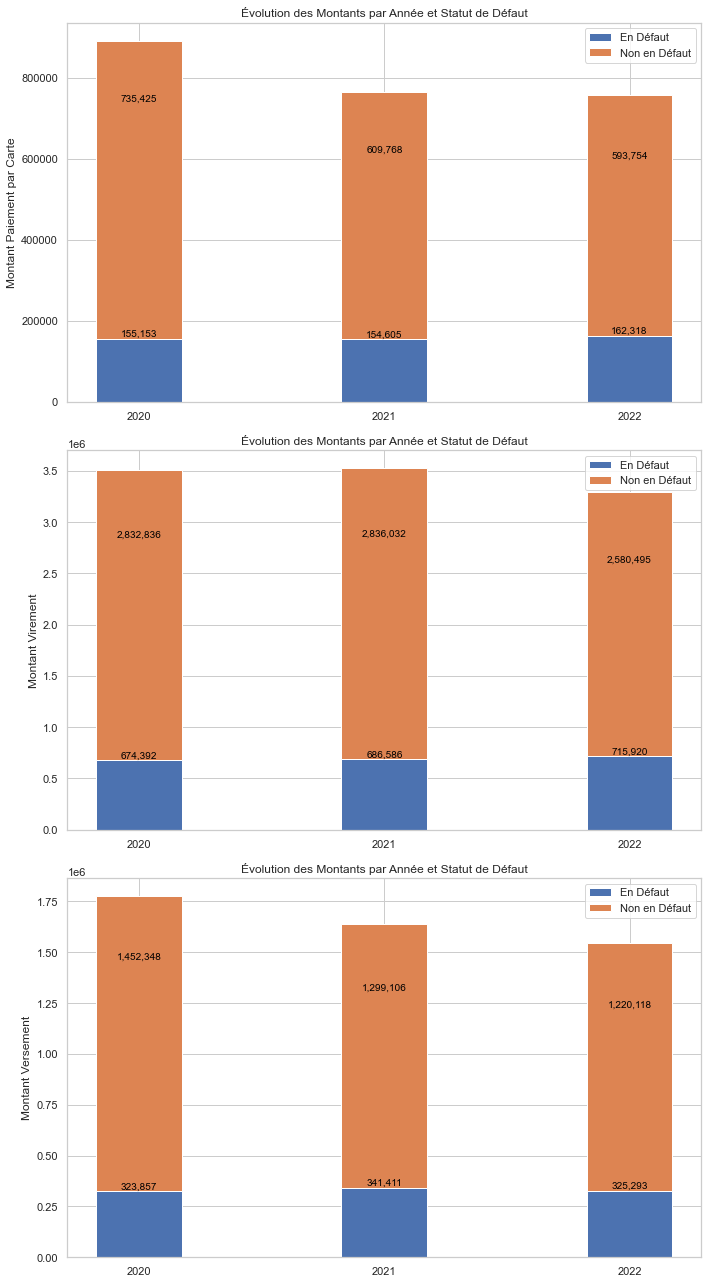

In [183]:
# Calculez le montant total de paiements par carte, virements et versements pour chaque année et chaque groupe
montant_paiement_par_carte_defaut = df[df['target'] == 1].groupby('annee')['mtn_paiement_par_carte'].sum()
montant_paiement_par_carte_non_defaut = df[df['target'] == 0].groupby('annee')['mtn_paiement_par_carte'].sum()

montant_virement_defaut = df[df['target'] == 1].groupby('annee')['mnt_virement'].sum()
montant_virement_non_defaut = df[df['target'] == 0].groupby('annee')['mnt_virement'].sum()

montant_versement_defaut = df[df['target'] == 1].groupby('annee')['mtn_versement'].sum()
montant_versement_non_defaut = df[df['target'] == 0].groupby('annee')['mtn_versement'].sum()

# Créez les graphiques en barres groupées
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

def create_grouped_bar_chart(ax, data1, data2, label1, label2, ylabel):
    width = 0.35
    x = data1.index
    ax.bar(x, data1, width, label=label1)
    ax.bar(x, data2, width, bottom=data1, label=label2)
    ax.set_ylabel(ylabel)
    ax.set_title(f'Évolution des Montants par Année et Statut de Défaut')
    ax.set_xticks(x)
    ax.set_xticklabels(data1.index)
    ax.legend()
    ax.grid(True)

create_grouped_bar_chart(axes[0], montant_paiement_par_carte_defaut, montant_paiement_par_carte_non_defaut, 'En Défaut', 'Non en Défaut', 'Montant Paiement par Carte')
create_grouped_bar_chart(axes[1], montant_virement_defaut, montant_virement_non_defaut, 'En Défaut', 'Non en Défaut', 'Montant Virement')
create_grouped_bar_chart(axes[2], montant_versement_defaut, montant_versement_non_defaut, 'En Défaut', 'Non en Défaut', 'Montant Versement')

# Afficher les valeurs sur les barres
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


### 5. Quel est l'effet des montants des dettes cumulées sur la capacité à rembourser les crédits 

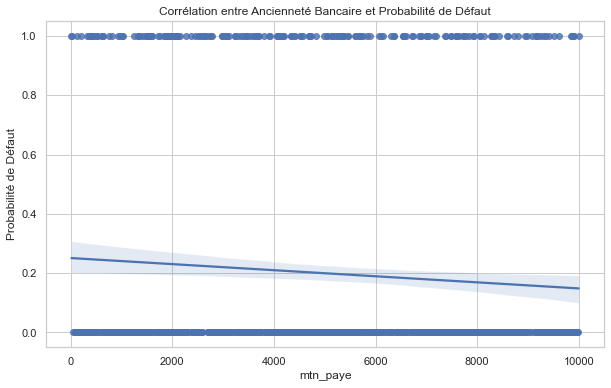

Corrélation entre mtn_impaye et Probabilité de Défaut : 0.0355


In [203]:
# Créer un graphique de dispersion et une ligne de régression pour visualiser la corrélation
plt.figure(figsize=(10, 6))
sns.regplot(x='mtn_impaye', y='target', data=df)#, logistic=True)
plt.xlabel("mtn_paye")
plt.ylabel("Probabilité de Défaut")
plt.title("Corrélation entre Ancienneté Bancaire et Probabilité de Défaut")
plt.show()

# Calculer la corrélation entre les deux variables
correlation = df['anciennete_bancaire_mois'].corr(df['target'])
print(f"Corrélation entre mtn_impaye et Probabilité de Défaut : {correlation:.4f}")


### 6. **Dans quelle mesure les comportements de paiement passés peuvent-ils prédire les comportements futurs en matière de crédit ?**

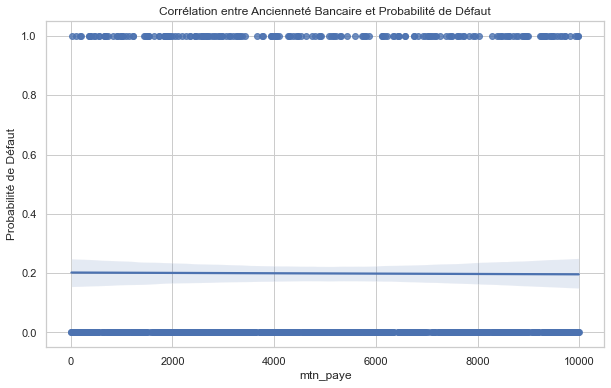

Corrélation entre mtn_paye et Probabilité de Défaut : 0.0355


In [192]:
# Créer un graphique de dispersion et une ligne de régression pour visualiser la corrélation
plt.figure(figsize=(10, 6))
sns.regplot(x='mtn_paye', y='target', data=df)#, logistic=True)
plt.xlabel("mtn_paye")
plt.ylabel("Probabilité de Défaut")
plt.title("Corrélation entre Ancienneté Bancaire et Probabilité de Défaut")
plt.show()

# Calculer la corrélation entre les deux variables
correlation = df['anciennete_bancaire_mois'].corr(df['target'])
print(f"Corrélation entre mtn_paye et Probabilité de Défaut : {correlation:.4f}")


### 7. **Quelles sont les différences de comportement entre les clients qui ont fait défaut et ceux qui n'ont pas fait défaut ?**

Q1 (premier quartile) : Le premier quartile divise les données en deux parties égales, où 25% des valeurs se situent en dessous de Q1. Cela signifie que 25% des données sont inférieures à Q1. 
 
Q2 (deuxième quartile) : Q2 est simplement une autre appellation pour la médiane. Il divise les données en deux parties égales, où 50% des valeurs se situent en dessous de Q2 et 50% des valeurs se situent au-dessus de Q2. 
 
Q3 (troisième quartile) : Le troisième quartile divise les données en deux parties égales, où 75% des valeurs se situent en dessous de Q3. Cela signifie que 25% des données sont supérieures à Q3

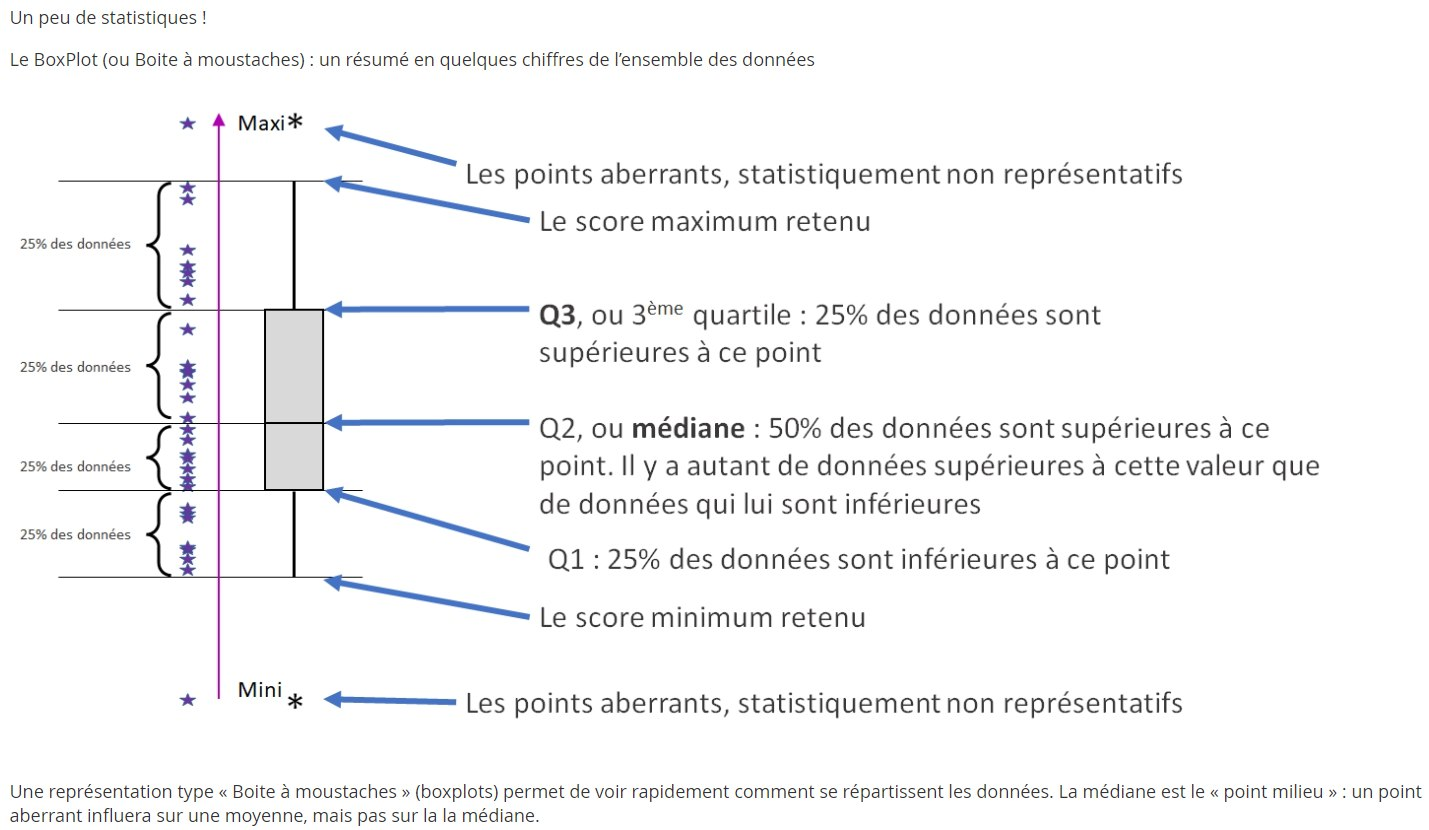

In [23]:
from IPython.display import Image
Image(filename='img.jpg')

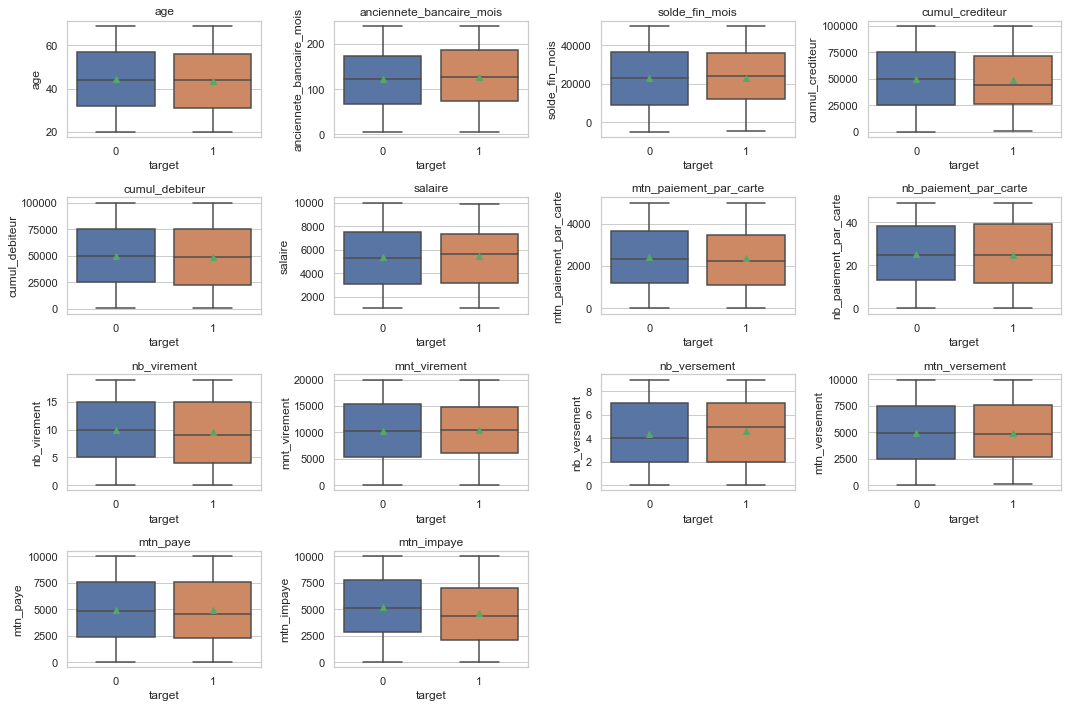

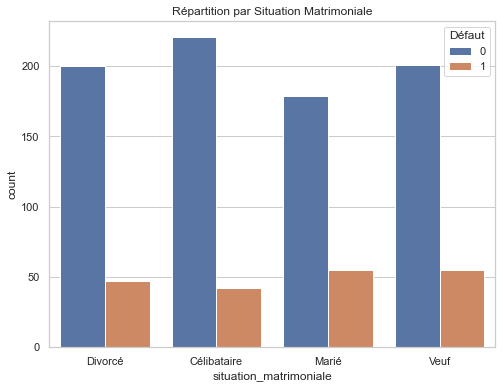

In [205]:
# Grouper les données par la variable cible 'target'
grouped = df.groupby('target')

# Comparer les moyennes des variables numériques pour les deux groupes
numeric_vars = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'cumul_crediteur', 'cumul_debiteur', 'salaire',
                'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement', 'mnt_virement', 'nb_versement',
                'mtn_versement', 'mtn_paye', 'mtn_impaye']

plt.figure(figsize=(15, 10))
for var in numeric_vars:
    plt.subplot(4, 4, numeric_vars.index(var) + 1)
    sns.boxplot(data=df, x='target', y=var,showmeans=True)
    plt.title(var)
plt.tight_layout()
plt.show()

# Comparer les proportions des catégories de la variable 'situation_matrimoniale' pour les deux groupes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='situation_matrimoniale', hue='target')
plt.title('Répartition par Situation Matrimoniale')
plt.legend(title='Défaut')
plt.show()


### 8. **Comment le niveau de revenu (représenté par le salaire) influence-t-il la probabilité de défaut de paiement ?**

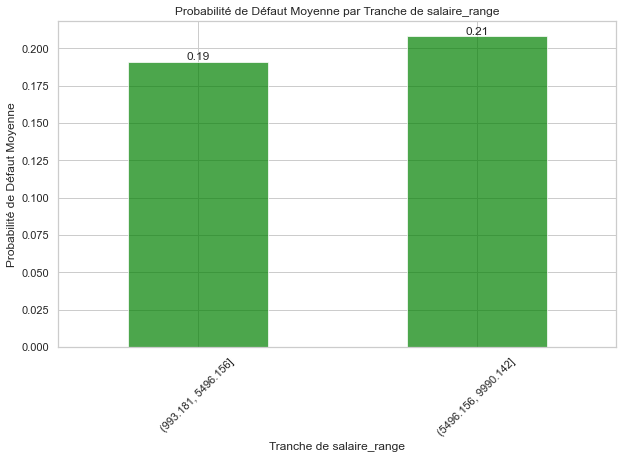

In [218]:
df['salaire_range'] = pd.cut(df['salaire'], bins=2)
default_by_seniority = df.groupby('salaire_range')['target'].mean()

plt.figure(figsize=(10, 6))
bar_plot = default_by_seniority.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Tranche de salaire_range')
plt.ylabel('Probabilité de Défaut Moyenne')
plt.title('Probabilité de Défaut Moyenne par Tranche de salaire_range')
plt.xticks(rotation=45)

# Ajouter les annotations des probabilités moyennes sur les barres
for index, value in enumerate(default_by_seniority):
    bar_plot.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

plt.show()


### 10. **Comment les comportements financiers varient-ils en fonction de l'âge des emprunteurs ?

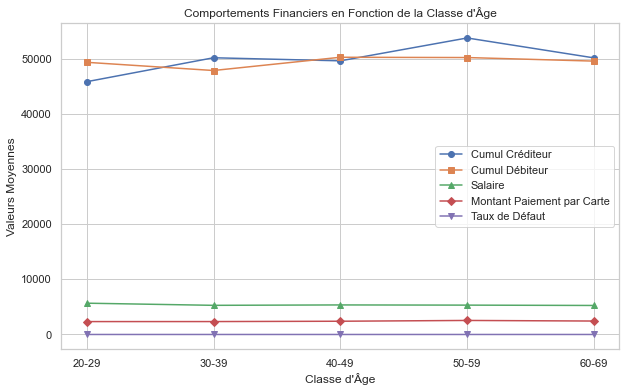

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du DataFrame (vous pouvez remplacer cette partie par votre propre DataFrame)
# df = ...

# Définition des classes d'âge
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Ajout d'une colonne pour la classe d'âge
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calcul des agrégats en fonction de la classe d'âge
age_group_means = df.groupby('age_group').agg({
    'cumul_crediteur': 'mean',  # Montant moyen cumulé créditeur
    'cumul_debiteur': 'mean',   # Montant moyen cumulé débiteur
    'salaire': 'mean',          # Salaire moyen
    'mtn_paiement_par_carte': 'mean',  # Montant moyen paiement par carte
    'target': 'mean'            # Taux de Défaut moyen
}).reset_index()

# Création du graphique
plt.figure(figsize=(10, 6))

plt.plot(age_group_means['age_group'], age_group_means['cumul_crediteur'], label='Cumul Créditeur', marker='o')
plt.plot(age_group_means['age_group'], age_group_means['cumul_debiteur'], label='Cumul Débiteur', marker='s')
plt.plot(age_group_means['age_group'], age_group_means['salaire'], label='Salaire', marker='^')
plt.plot(age_group_means['age_group'], age_group_means['mtn_paiement_par_carte'], label='Montant Paiement par Carte', marker='D')
plt.plot(age_group_means['age_group'], age_group_means['target'], label='Taux de Défaut', marker='v')

plt.xlabel('Classe d\'Âge')
plt.ylabel('Valeurs Moyennes')
plt.title('Comportements Financiers en Fonction de la Classe d\'Âge')
plt.legend()
plt.grid(True)

plt.show()


### 12. **Y a-t-il des saisons ou des périodes de l'année où les défauts de paiement sont plus fréquents ?**

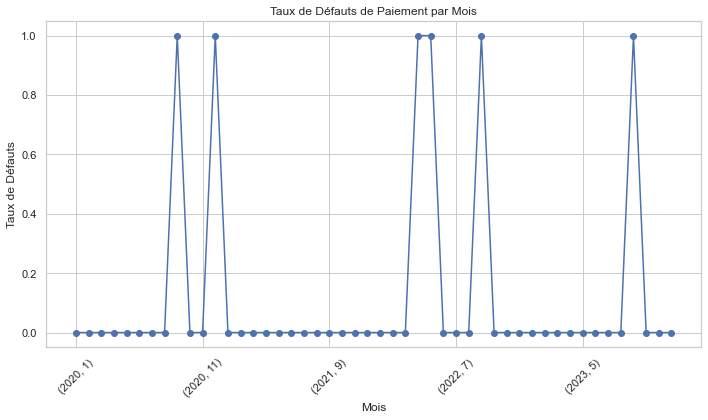

In [231]:
data=df[df.annee.isin([2020,2021,2022,2023])]

# Calculer la fréquence des défauts par mois
defauts_par_mois = data.groupby(['annee', 'mois'])['target'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
defauts_par_mois.plot(marker='o')
plt.title("Taux de Défauts de Paiement par Mois")
plt.xlabel("Mois")
plt.ylabel("Taux de Défauts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


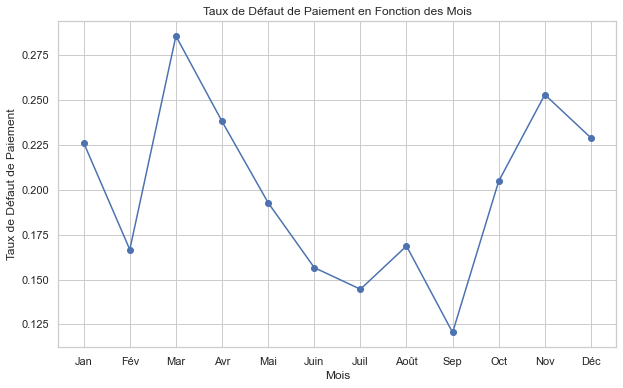

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrégation des données par mois et calcul du taux de défaut
monthly_defaults = df.groupby('mois')['target'].mean()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(monthly_defaults.index, monthly_defaults.values, marker='o')
plt.title("Taux de Défaut de Paiement en Fonction des Mois")
plt.xlabel("Mois")
plt.ylabel("Taux de Défaut de Paiement")
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)
plt.show()


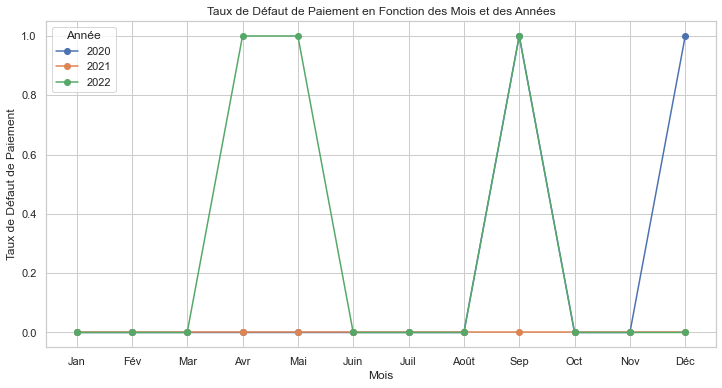

In [238]:
data=df[df.annee.isin([2020,2021,2022])]
# Agrégation des données par année et mois et calcul du taux de défaut
yearly_monthly_defaults = data.groupby(['annee', 'mois'])['target'].mean().reset_index()

# Création du graphique
plt.figure(figsize=(12, 6))

# Utilisation d'une boucle pour itérer à travers chaque année
for year in sorted(yearly_monthly_defaults['annee'].unique()):
    data_year = yearly_monthly_defaults[yearly_monthly_defaults['annee'] == year]
    plt.plot(data_year['mois'], data_year['target'], marker='o', label=str(year))

plt.title("Taux de Défaut de Paiement en Fonction des Mois et des Années")
plt.xlabel("Mois")
plt.ylabel("Taux de Défaut de Paiement")
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.legend(title='Année')
plt.grid(True)
plt.show()


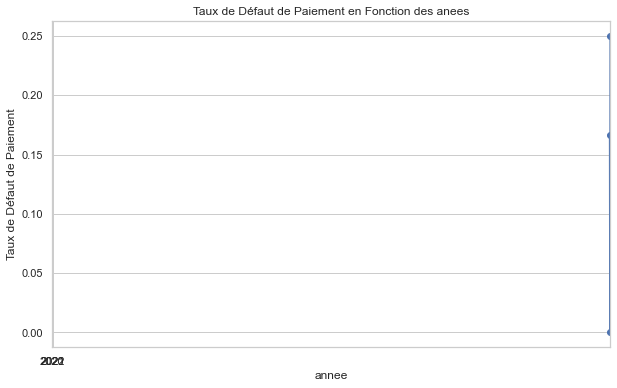

In [245]:
data=df[df.annee.isin([2020,2021,2022])]

# Agrégation des données par mois et calcul du taux de défaut
monthly_defaults = data.groupby('annee')['target'].mean()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(monthly_defaults.index, monthly_defaults.values, marker='o')
plt.title("Taux de Défaut de Paiement en Fonction des anees")
plt.xlabel("annee")
plt.ylabel("Taux de Défaut de Paiement")
plt.xticks(range(1, 4), ['2020', '2021', '2022'])
plt.grid(True)
plt.show()

### 14. **Quelles caractéristiques des emprunteurs ont le plus grand impact sur le score de crédit ?**

In [250]:
import pandas as pd
import statsmodels.api as sm

# Charger le DataFrame depuis le code que vous avez fourni
# Assurez-vous que le DataFrame 'df' est déjà créé

# Sélectionner les variables indépendantes (caractéristiques) pour la modélisation
features = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'nb_pret', 'cumul_crediteur', 'cumul_debiteur', 'salaire', 'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement', 'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye', 'mtn_impaye']

# Ajouter une constante à la matrice de caractéristiques (interception)
X = sm.add_constant(df[features])

# Variable cible (target)
y = df['target']

# Créer le modèle de régression logistique
model = sm.Logit(y, X)

# Ajuster le modèle aux données
results = model.fit()

# Afficher les résultats de la régression logistique
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.493913
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                           15
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                 0.01022
Time:                        13:34:53   Log-Likelihood:                -493.91
converged:                       True   LL-Null:                       -499.01
Covariance Type:            nonrobust   LLR p-value:                    0.8070
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0247      0.572     -1.793      0.073      -2.145

In [252]:
df.columns

Index(['id', 'date_arrete', 'annee', 'mois', 'age', 'anciennete_bancaire_mois',
       'situation_matrimoniale', 'solde_fin_mois', 'nb_pret',
       'cumul_crediteur', 'cumul_debiteur', 'salaire',
       'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement',
       'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye',
       'mtn_impaye', 'target', 'anciennete_bancaire_range', 'dettes_cumulees',
       'paiement_anormaux', 'salaire_range', 'age_group', 'constante'],
      dtype='object')

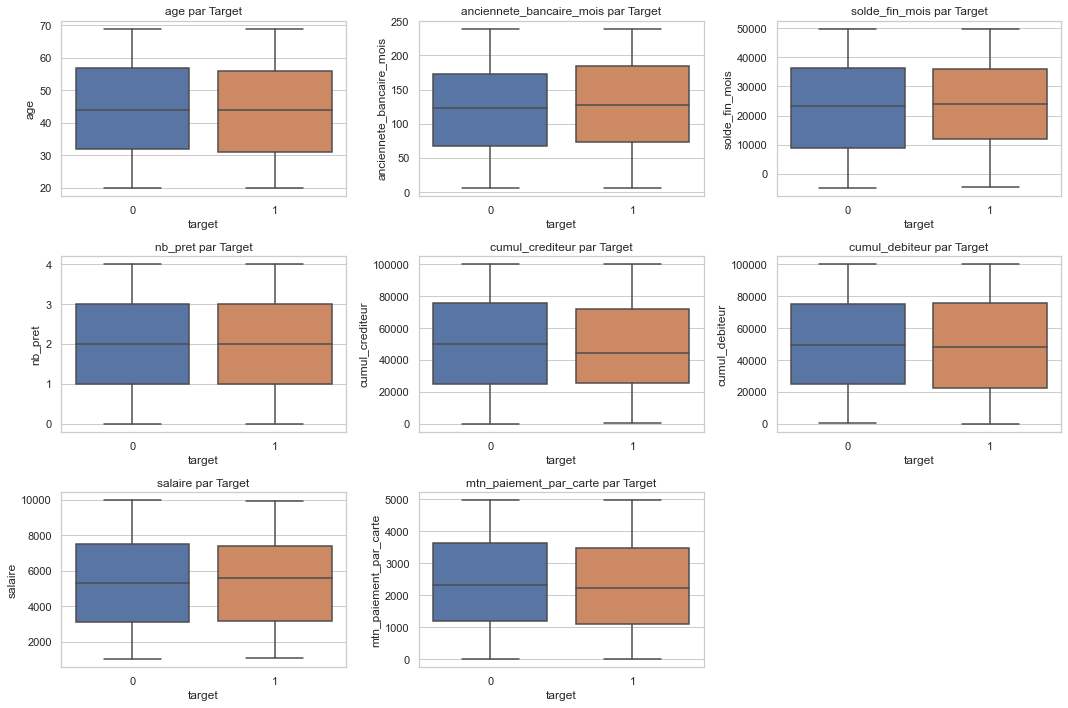

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le DataFrame depuis le code que vous avez fourni
# Assurez-vous que le DataFrame 'df' est déjà créé

# Caractéristiques à comparer
features_to_compare = ['age', 'anciennete_bancaire_mois', 'solde_fin_mois', 'nb_pret', 'cumul_crediteur', 'cumul_debiteur', 'salaire', 'mtn_paiement_par_carte']

# Comparaison de distributions
plt.figure(figsize=(15, 10))
for feature in features_to_compare:
    plt.subplot(3, 3, features_to_compare.index(feature) + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} par Target')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


### step 3 analysis of potential predictors

# bigining continuous variables

In [336]:
df.situation_matrimoniale

779        Divorcé
186    Célibataire
255    Célibataire
856          Marié
348    Célibataire
          ...     
549    Célibataire
207    Célibataire
388          Marié
903    Célibataire
928           Veuf
Name: situation_matrimoniale, Length: 1000, dtype: string

In [330]:
df.situation_matrimoniale =  df.situation_matrimoniale.astype('string')

In [337]:
import pandas as pd

data.situation_matrimoniale =  data.situation_matrimoniale.astype('string')

# Découper une colonne catégorielle en classes
num_bins = 3  # Nombre de classes souhaitées
colonne_categorique = 'situation_matrimoniale'  # Remplacez par le nom de votre colonne

# Découper la colonne en classes
df['colonne_classes'] = pd.cut(data[colonne_categorique], bins=num_bins, labels=False)


TypeError: can only concatenate str (not "float") to str

In [338]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle 'df'

# Fonction pour découper une variable numérique en classes
def discretize_variable(data, variable, bins):
    labels = [f'Bin {i}' for i in range(1, len(bins))]
    data[f'{variable}_bin'] = pd.cut(data[variable], bins=bins, labels=labels)
    return data

# Découper une variable numérique en classes (par exemple, 'age')
bins = [20, 30, 40, 50, 60, 70]
df = discretize_variable(df, 'age', bins)

# Calculer le taux de risque pour chaque classe
risk_rates = df.groupby('age_bin')['target'].mean().reset_index()
risk_rates.rename(columns={'target': 'Risk Rate'}, inplace=True)

# Calculer l'information value pour chaque classe
def calculate_iv(data, variable_bin):
    obs = pd.crosstab(data[variable_bin], data['target'])
    chi2, p, dof, expected = chi2_contingency(obs)
    iv = np.sum((obs / np.sum(obs)) * np.log((obs / np.sum(obs)) / (expected / np.sum(expected))))
    return iv

iv_values = []
for bin_label in df['age_bin'].unique():
    iv = calculate_iv(df[df['age_bin'] == bin_label], 'age_bin')
    iv_values.append({'age_bin': bin_label, 'IV': iv})

iv_df = pd.DataFrame(iv_values)

# Afficher le taux de risque et les valeurs d'IV
print(risk_rates)
print(iv_df)


ValueError: No data; `observed` has size 0.

In [339]:
# Calculer le taux de risque pour chaque classe
risk_rates = df.groupby('age_bin')['target'].mean().reset_index()
risk_rates.rename(columns={'target': 'Risk Rate'}, inplace=True)

# Définir un seuil pour les occurrences minimales
min_occurrences = 10

# Regrouper les classes adjacentes avec un nombre d'occurrences faible
def merge_low_occurrence_bins(data, variable_bin, min_occurrences):
    bin_occurrences = data[variable_bin].value_counts()
    bins_to_merge = bin_occurrences[bin_occurrences < min_occurrences].index
    data[variable_bin] = data[variable_bin].replace(bins_to_merge, 'Autre')
    return data

df = merge_low_occurrence_bins(df, 'age_bin', min_occurrences)

# Calculer l'information value pour chaque classe
iv_values = []
for bin_label in df['age_bin'].unique():
    iv = calculate_iv(df[df['age_bin'] == bin_label], 'age_bin')
    iv_values.append({'age_bin': bin_label, 'IV': iv})

iv_df = pd.DataFrame(iv_values)

# Afficher le taux de risque et les valeurs d'IV
print(risk_rates)
print(iv_df)


ValueError: No data; `observed` has size 0.

In [341]:
df.columns

Index(['id', 'date_arrete', 'annee', 'mois', 'age', 'anciennete_bancaire_mois',
       'situation_matrimoniale', 'solde_fin_mois', 'nb_pret',
       'cumul_crediteur', 'cumul_debiteur', 'salaire',
       'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement',
       'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye',
       'mtn_impaye', 'target', 'anciennete_bancaire_range', 'dettes_cumulees',
       'paiement_anormaux', 'salaire_range', 'age_group', 'constante',
       'situation_matrimoniale_regroupée', 'marital_status_group',
       'situation_Célibataire', 'situation_Divorcé', 'situation_Marié',
       'situation_Veuf', 'situation_Célibataire', 'situation_Divorcé',
       'situation_Marié', 'situation_Veuf', 'age_bin'],
      dtype='object')

In [395]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle 'df'
# Supposons également que vous avez une colonne 'variable_numerique' à découper en classes

# Définir le nombre de bins (intervalles)
num_bins = 4

# Appliquer la découpe en classes avec le nombre de bins défini
df['solde_fin_mois1'] = pd.cut(df['solde_fin_mois'], bins=num_bins)

# Calculer le tableau de contingence entre les classes découpées et la variable cible 'target'
contingency_table = pd.crosstab(df['solde_fin_mois1'], df['target'])

# Effectuer le test du chi2 pour évaluer la corrélation entre les classes et la variable cible
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Tableau de contingence :\n", contingency_table)
print("\nRésultats du test du chi2 :")
print("Chi2:", chi2)
print("P-value:", p)
print("Degrés de liberté:", dof)
print("Expected frequencies:\n", expected)


Tableau de contingence :
 target                    0   1
solde_fin_mois1                
(1004.665, 13257.424]   180  30
(13257.424, 25461.368]  181  50
(25461.368, 37665.312]  182  49
(37665.312, 49869.255]  181  43

Résultats du test du chi2 :
Chi2: 4.762765779340365
P-value: 0.19001593656330115
Degrés de liberté: 3
Expected frequencies:
 [[169.6875   40.3125 ]
 [186.65625  44.34375]
 [186.65625  44.34375]
 [181.       43.     ]]


In [386]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle 'df'
# Supposons également que vous avez une colonne 'variable_numerique' à découper en classes

# Définir les bornes des intervalles
intervals = [0, 1000, 2000, 3000, np.inf]
labels = ['<1000', '1000-2000', '2000-3000', '>3000']

# Appliquer la découpe en classes
df['solde_fin_mois1'] = pd.cut(df['solde_fin_mois'], bins=intervals, labels=labels)


In [367]:
df.head()

,id,date_arrete,annee,mois,age,anciennete_bancaire_mois,situation_matrimoniale,solde_fin_mois,nb_pret,cumul_crediteur,...,solde_fin_mois1,solde_fin_mois_class,cumul_crediteur_class,cumul_debiteur_class,salaire_class,mtn_paiement_par_carte_class,mnt_virement_class,mtn_versement_class,mtn_paye_class,mtn_impaye_class
779,780,2084-12-31,2084,12,44,28,Divorcé,14884.776931,4,97256.823565,...,>3000,Q2,"(79966.892, 99935.03]","(80035.222, 99946.068]","(8192.548, 9990.142]","(3984.461, 4980.064]","(12013.206, 16003.335]","(4002.016, 5997.005]","(2008.359, 4003.381]","(3.214, 2010.169]"
186,187,2035-07-31,2035,7,68,64,Célibataire,15543.609729,4,39363.552028,...,>3000,Q2,"(20062.479, 40030.617]","(60124.376, 80035.222]","(993.181, 2799.764]","(2988.859, 3984.461]","(16003.335, 19993.464]","(4002.016, 5997.005]","(3.361, 2008.359]","(3.214, 2010.169]"
255,256,2041-04-30,2041,4,45,181,Célibataire,28623.513122,3,1200.302727,...,>3000,Q3,"(-5.499, 20062.479]","(20302.684, 40213.53]","(993.181, 2799.764]","(1993.256, 2988.859]","(22.868, 4032.948]","(4002.016, 5997.005]","(5998.404, 7993.426]","(3.214, 2010.169]"
856,857,2091-05-31,2091,5,32,175,Marié,19426.338557,0,85085.275732,...,>3000,Q2,"(79966.892, 99935.03]","(20302.684, 40213.53]","(6394.953, 8192.548]","(3984.461, 4980.064]","(4032.948, 8023.077]","(7991.995, 9986.985]","(7993.426, 9988.448]","(3.214, 2010.169]"
348,349,2049-01-31,2049,1,20,35,Célibataire,2350.781978,3,32617.025413,...,2000-3000,Q1,"(20062.479, 40030.617]","(20302.684, 40213.53]","(6394.953, 8192.548]","(1993.256, 2988.859]","(16003.335, 19993.464]","(5997.005, 7991.995]","(3.361, 2008.359]","(3.214, 2010.169]"


In [368]:
# Calculer le taux de risque par classe
risk_rate_by_class = df.groupby('solde_fin_mois1')['target'].mean()
print(risk_rate_by_class)


solde_fin_mois1
<1000             NaN
1000-2000    0.235294
2000-3000    0.062500
>3000        0.193511
Name: target, dtype: float64


In [369]:
# Calculer l'IV pour chaque classe
def calculate_iv(data, target_column):
    grouped = data.groupby(target_column)
    groups = data[target_column].unique()
    iv_values = []
    
    for group in groups:
        obs_group = grouped.get_group(group)
        obs_event = obs_group[obs_group['target'] == 1].shape[0]
        obs_non_event = obs_group[obs_group['target'] == 0].shape[0]
        total_event = data[data['target'] == 1].shape[0]
        total_non_event = data[data['target'] == 0].shape[0]
        
        iv = ((obs_event / total_event) - (obs_non_event / total_non_event)) * np.log((obs_event * total_non_event) / (obs_non_event * total_event))
        iv_values.append(iv)
    
    return sum(iv_values)
# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
df = df.dropna(subset=['solde_fin_mois1', 'target'])
iv_value = calculate_iv(df, 'solde_fin_mois1')
print("Information Value (IV) :", iv_value)


Information Value (IV) : 0.02040594309352666


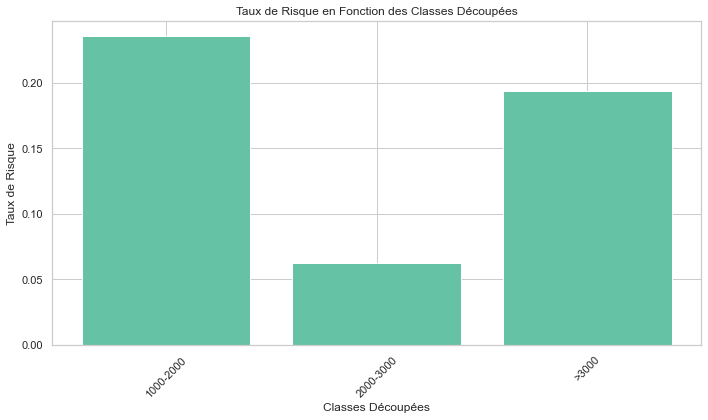

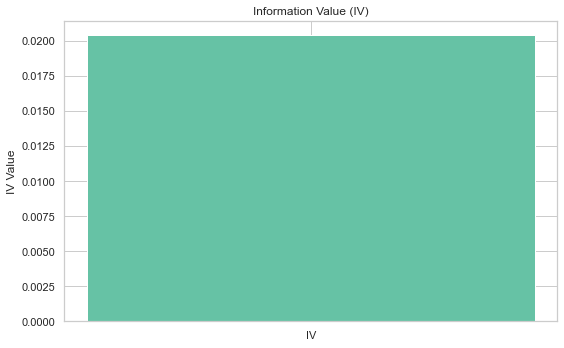

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle 'df'
# Supposons également que vous avez déjà découpé la variable numérique en classes et calculé le taux de risque et l'IV

# Créer le graphique du taux de risque en fonction des classes découpées
plt.figure(figsize=(10, 6))
plt.bar(risk_rate_by_class.index, risk_rate_by_class.values)
plt.title("Taux de Risque en Fonction des Classes Découpées")
plt.xlabel("Classes Découpées")
plt.ylabel("Taux de Risque")
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique du taux de risque
plt.show()

# Afficher le graphique d'Information Value (IV)
plt.figure(figsize=(8, 5))
plt.bar("IV", iv_value)
plt.title("Information Value (IV)")
plt.ylabel("IV Value")
plt.tight_layout()

# Afficher le graphique d'IV
plt.show()


In [371]:
df.columns

Index(['id', 'date_arrete', 'annee', 'mois', 'age', 'anciennete_bancaire_mois',
       'situation_matrimoniale', 'solde_fin_mois', 'nb_pret',
       'cumul_crediteur', 'cumul_debiteur', 'salaire',
       'mtn_paiement_par_carte', 'nb_paiement_par_carte', 'nb_virement',
       'mnt_virement', 'nb_versement', 'mtn_versement', 'mtn_paye',
       'mtn_impaye', 'target', 'anciennete_bancaire_range', 'dettes_cumulees',
       'paiement_anormaux', 'salaire_range', 'age_group', 'constante',
       'situation_matrimoniale_regroupée', 'marital_status_group',
       'situation_Célibataire', 'situation_Divorcé', 'situation_Marié',
       'situation_Veuf', 'situation_Célibataire', 'situation_Divorcé',
       'situation_Marié', 'situation_Veuf', 'age_bin', 'solde_fin_mois1'],
      dtype='object')

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle 'df'

# Variables numériques à découper
numeric_vars = ['solde_fin_mois', 'cumul_crediteur', 'cumul_debiteur', 'salaire', 
                'mtn_paiement_par_carte', 'mnt_virement', 'mtn_versement', 
                'mtn_paye', 'mtn_impaye']

# Découper les variables numériques en classes (par exemple, 5 classes)
num_classes = 5
for var in numeric_vars:
    df[f'{var}_class'] = pd.cut(df[var], num_classes)

# Calculer le taux de risque (défaut par classe)
def calculate_default_rate(group):
    total_clients = group.shape[0]
    total_defaults = group['target'].sum()
    default_rate = total_defaults / total_clients
    return default_rate

default_rates = df.groupby(['annee', 'target'])[numeric_vars].apply(calculate_default_rate).reset_index()



# Calculer l'Information Value (IV)
def calculate_iv(group):
    group_size = group.shape[0]
    non_default = group['target'].value_counts().get(0, 0)
    default = group['target'].value_counts().get(1, 0)
    
    non_default_percent = non_default / group_size
    default_percent = default / group_size
    
    if non_default_percent == 0 or default_percent == 0:
        return 0
    
    iv = (non_default_percent - default_percent) * np.log(non_default_percent / default_percent)
    return iv

iv_values = df.groupby(['annee', 'target'])[numeric_vars].apply(calculate_iv).reset_index()


# Créer des graphiques pour le taux de risque et l'IV
plt.figure(figsize=(12, 6))

# Graphique du taux de risque
plt.subplot(1, 2, 1)
for year in df['annee'].unique():
    year_data = default_rates[default_rates['annee'] == year]
    plt.plot(year_data['target'], year_data['default_rate'], label=year)
plt.xlabel('Target')
plt.ylabel('Taux de Risque')
plt.title('Taux de Risque en Fonction du Target par Année')
plt.legend()

# Graphique de l'IV

plt.subplot(1, 2, 2)
for year in df['annee'].unique():
    year_data = iv_values[iv_values['annee'] == year]
    plt.plot(year_data['target'], year_data[0], label=year)
plt.xlabel('Target')
plt.ylabel('Information Value')
plt.title('Information Value en Fonction du Target par Année')
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'target'

In [396]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Supposons que votre DataFrame s'appelle 'df'
# Supposons également que vous avez les colonnes à découper en classes dans la liste 'numeric_columns'

# Définir le nombre de bins (intervalles)
num_bins = 4

# Liste des colonnes à découper en classes
numeric_columns = ['solde_fin_mois', 'cumul_crediteur', 'cumul_debiteur', 'salaire',
                   'mtn_paiement_par_carte', 'mnt_virement', 'mtn_versement', 'mtn_paye', 'mtn_impaye']

# Parcourir chaque colonne numérique
for col in numeric_columns:
    # Appliquer la découpe en classes avec le nombre de bins défini
    df['{}_class'.format(col)] = pd.cut(df[col], bins=num_bins)
    
    # Calculer le tableau de contingence entre les classes découpées et la variable cible 'target'
    contingency_table = pd.crosstab(df['{}_class'.format(col)], df['target'])
    
    # Effectuer le test du chi2 pour évaluer la corrélation entre les classes et la variable cible
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Afficher les résultats pour chaque colonne
    print("Colonnes :", col)
    print("Tableau de contingence :\n", contingency_table)
    print("\nRésultats du test du chi2 :")
    print("Chi2:", chi2)
    print("P-value:", p)
    print("Degrés de liberté:", dof)
    print("Expected frequencies:\n", expected)
    print("---------------------------------------")


Colonnes : solde_fin_mois
Tableau de contingence :
 target                    0   1
solde_fin_mois_class           
(1004.665, 13257.424]   180  30
(13257.424, 25461.368]  181  50
(25461.368, 37665.312]  182  49
(37665.312, 49869.255]  181  43

Résultats du test du chi2 :
Chi2: 4.762765779340365
P-value: 0.19001593656330115
Degrés de liberté: 3
Expected frequencies:
 [[169.6875   40.3125 ]
 [186.65625  44.34375]
 [186.65625  44.34375]
 [181.       43.     ]]
---------------------------------------
Colonnes : cumul_crediteur
Tableau de contingence :
 target                    0   1
cumul_crediteur_class          
(-5.499, 25054.514]     180  42
(25054.514, 50014.686]  187  54
(50014.686, 74974.858]  174  37
(74974.858, 99935.03]   183  39

Résultats du test du chi2 :
Chi2: 2.3671420920607087
P-value: 0.4997804177846751
Degrés de liberté: 3
Expected frequencies:
 [[179.38392857  42.61607143]
 [194.73660714  46.26339286]
 [170.49553571  40.50446429]
 [179.38392857  42.61607143]]
---------

IndexError: index 0 is out of bounds for axis 0 with size 0

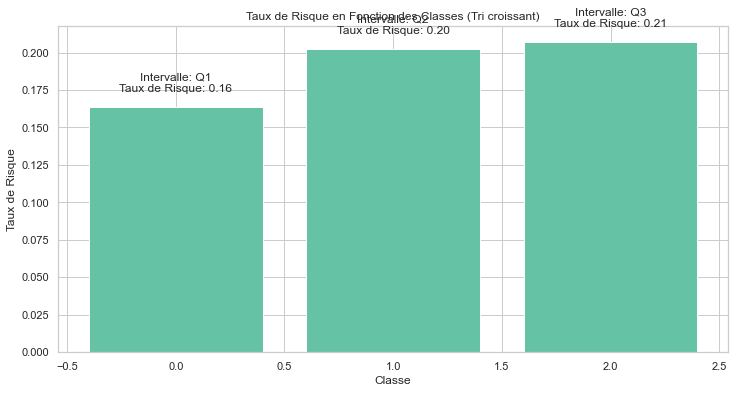

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle 'df'

# Définir le nombre de bins pour la découpe en classes
num_bins = 3  # Vous pouvez ajuster ce nombre en fonction de vos préférences

# Appliquer la découpe en classes avec le nombre de bins
df['solde_fin_mois_class'] = pd.cut(df['solde_fin_mois'], bins=num_bins, labels=False)

# Calculer le taux de risque par classe
grouped_data = df.groupby(['solde_fin_mois_class', 'target']).size().unstack().reset_index()
grouped_data.fillna(0, inplace=True)

grouped_data['risk_rate'] = grouped_data[1] / (grouped_data[0] + grouped_data[1])

# Trier le DataFrame par ordre croissant du taux de risque
grouped_data = grouped_data.sort_values(by='risk_rate', ascending=True)

# Créer un graphique du taux de risque en fonction des classes
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['solde_fin_mois_class'], grouped_data['risk_rate'])
plt.xlabel('Classe')
plt.ylabel('Taux de Risque')
plt.title('Taux de Risque en Fonction des Classes (Tri croissant)')
plt.xticks(range(num_bins), labels)  # Changer 'labels' en fonction de la découpe en classes

# Afficher les intervalles et les taux de risque correspondants
for i, label in enumerate(labels):
    interval = labels[i]
    risk_rate = grouped_data[grouped_data['solde_fin_mois_class'] == i]['risk_rate'].values[0]
    plt.text(i, risk_rate + 0.01, f'Intervalle: {interval}\nTaux de Risque: {risk_rate:.2f}', ha='center')

plt.show()
